# Global Terrorism Project

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2015 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

In this notebook, I analyzed the global terrorist attacks and created numerous vizualizations in order to better understand the exceptionally large dataset. I applied Bayesian statistics to compare two different countries and see if one was significantly more dangerous than the other during 21st century. Additionally, the year 1993 is missing from this dataset so I attempted to estimate the number of bombings for 1993 by using a time series model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [2]:
gt1 = pd.read_csv('/Users/tkh5044/Desktop/ga-dsi/misc/global-terrorism/gtd_70to91_0616dist.csv', low_memory=False)

In [3]:
gt2 = pd.read_csv('/Users/tkh5044/Desktop/ga-dsi/misc/global-terrorism/gtd_92to11_0616dist.csv', low_memory=False)

In [4]:
gt3 = pd.read_csv('/Users/tkh5044/Desktop/ga-dsi/misc/global-terrorism/gtd_12to15_0616dist.csv', low_memory=False)

In [5]:
gt1.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       0     0        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America       NaN   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia       NaN   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164            1         0      NaN   
1    Mexico city  19.432608  -99.133207            1         0      NaN   
2        Unknown  15.478598  120.599741            4         0      NaN   
3         Athens  37.983773   23.728157            1         0      NaN   
4        Fukouka  33.580412  130.396361            1         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1          0          NaN               .   
1     NaN      1      1      1          0          NaN               .   
2     NaN      1      1      1          0          NaN               .   
3     NaN      1      1      1          0          NaN               .   
4     NaN      1      1      1         -9          NaN               .   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0         0        1        0            1                   Assassination   
1         0        1        0            6     Hostage Taking (Kidnapping)   
2         0        1        0            1                   Assassination   
3         0        1        0            3               Bombing/Explosion   
4         0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN               .          NaN               .         14   
1          NaN               .          NaN               .          7   
2          NaN               .          NaN               .         10   
3          NaN               .          NaN               .          7   
4          NaN               .          NaN               .          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN             .           NaN                .   
1             Belgium        NaN             .           NaN                .   


In [6]:
print gt1.shape
print gt2.shape
print gt3.shape

(49566, 137)
(55072, 137)
(52134, 137)


In [7]:
gt = pd.concat([gt1, gt2, gt3], axis=0)
gt.shape

(156772, 137)

In [8]:
gt.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            152016
extended                   0
resolution            153270
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           151806
attacktype2_txt            0
attacktype3           156460
attacktype3_txt            0
targtype1     

In [9]:
gt[gt.duplicated()].shape

(0, 137)

# EDA

In [10]:
sns.set_style('whitegrid')
sns.set_context('poster')

## Attack Type

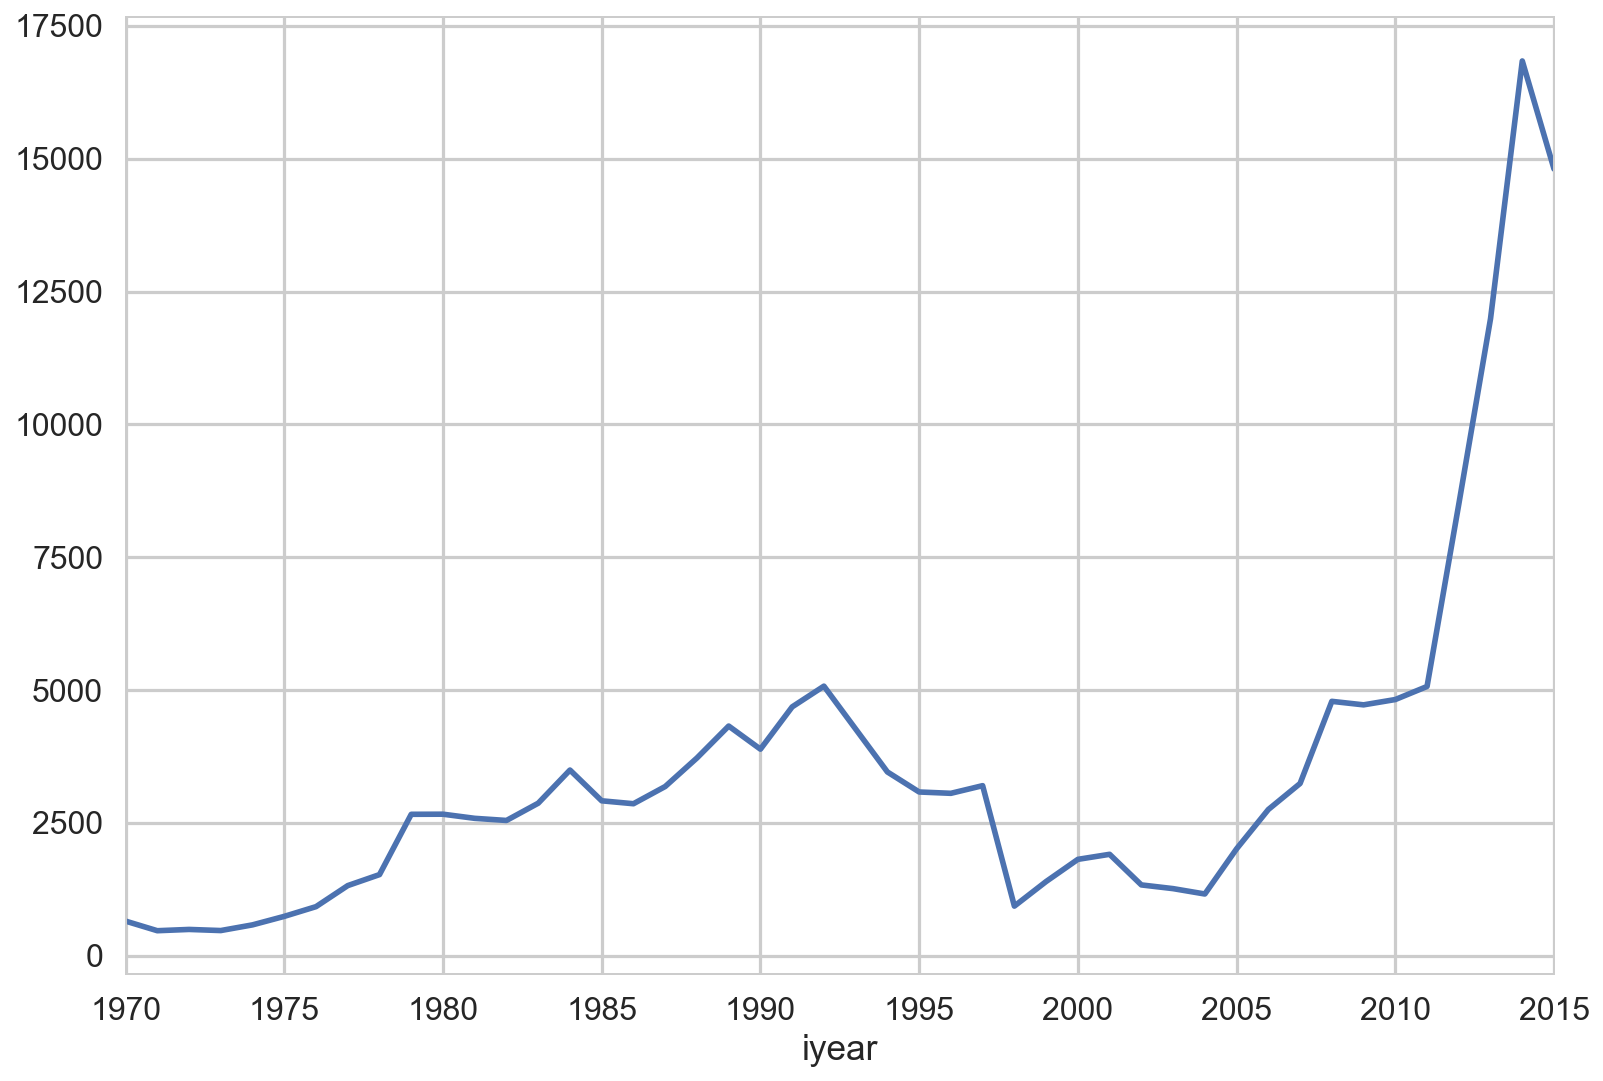

In [11]:
gt.groupby('iyear')['eventid'].count().plot()

In [12]:
gt.attacktype1_txt.value_counts()

Bombing/Explosion                      75963
Armed Assault                          37554
Assassination                          17582
Hostage Taking (Kidnapping)             9115
Facility/Infrastructure Attack          8849
Unknown                                 5490
Hostage Taking (Barricade Incident)      835
Unarmed Assault                          828
Hijacking                                556
Name: attacktype1_txt, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

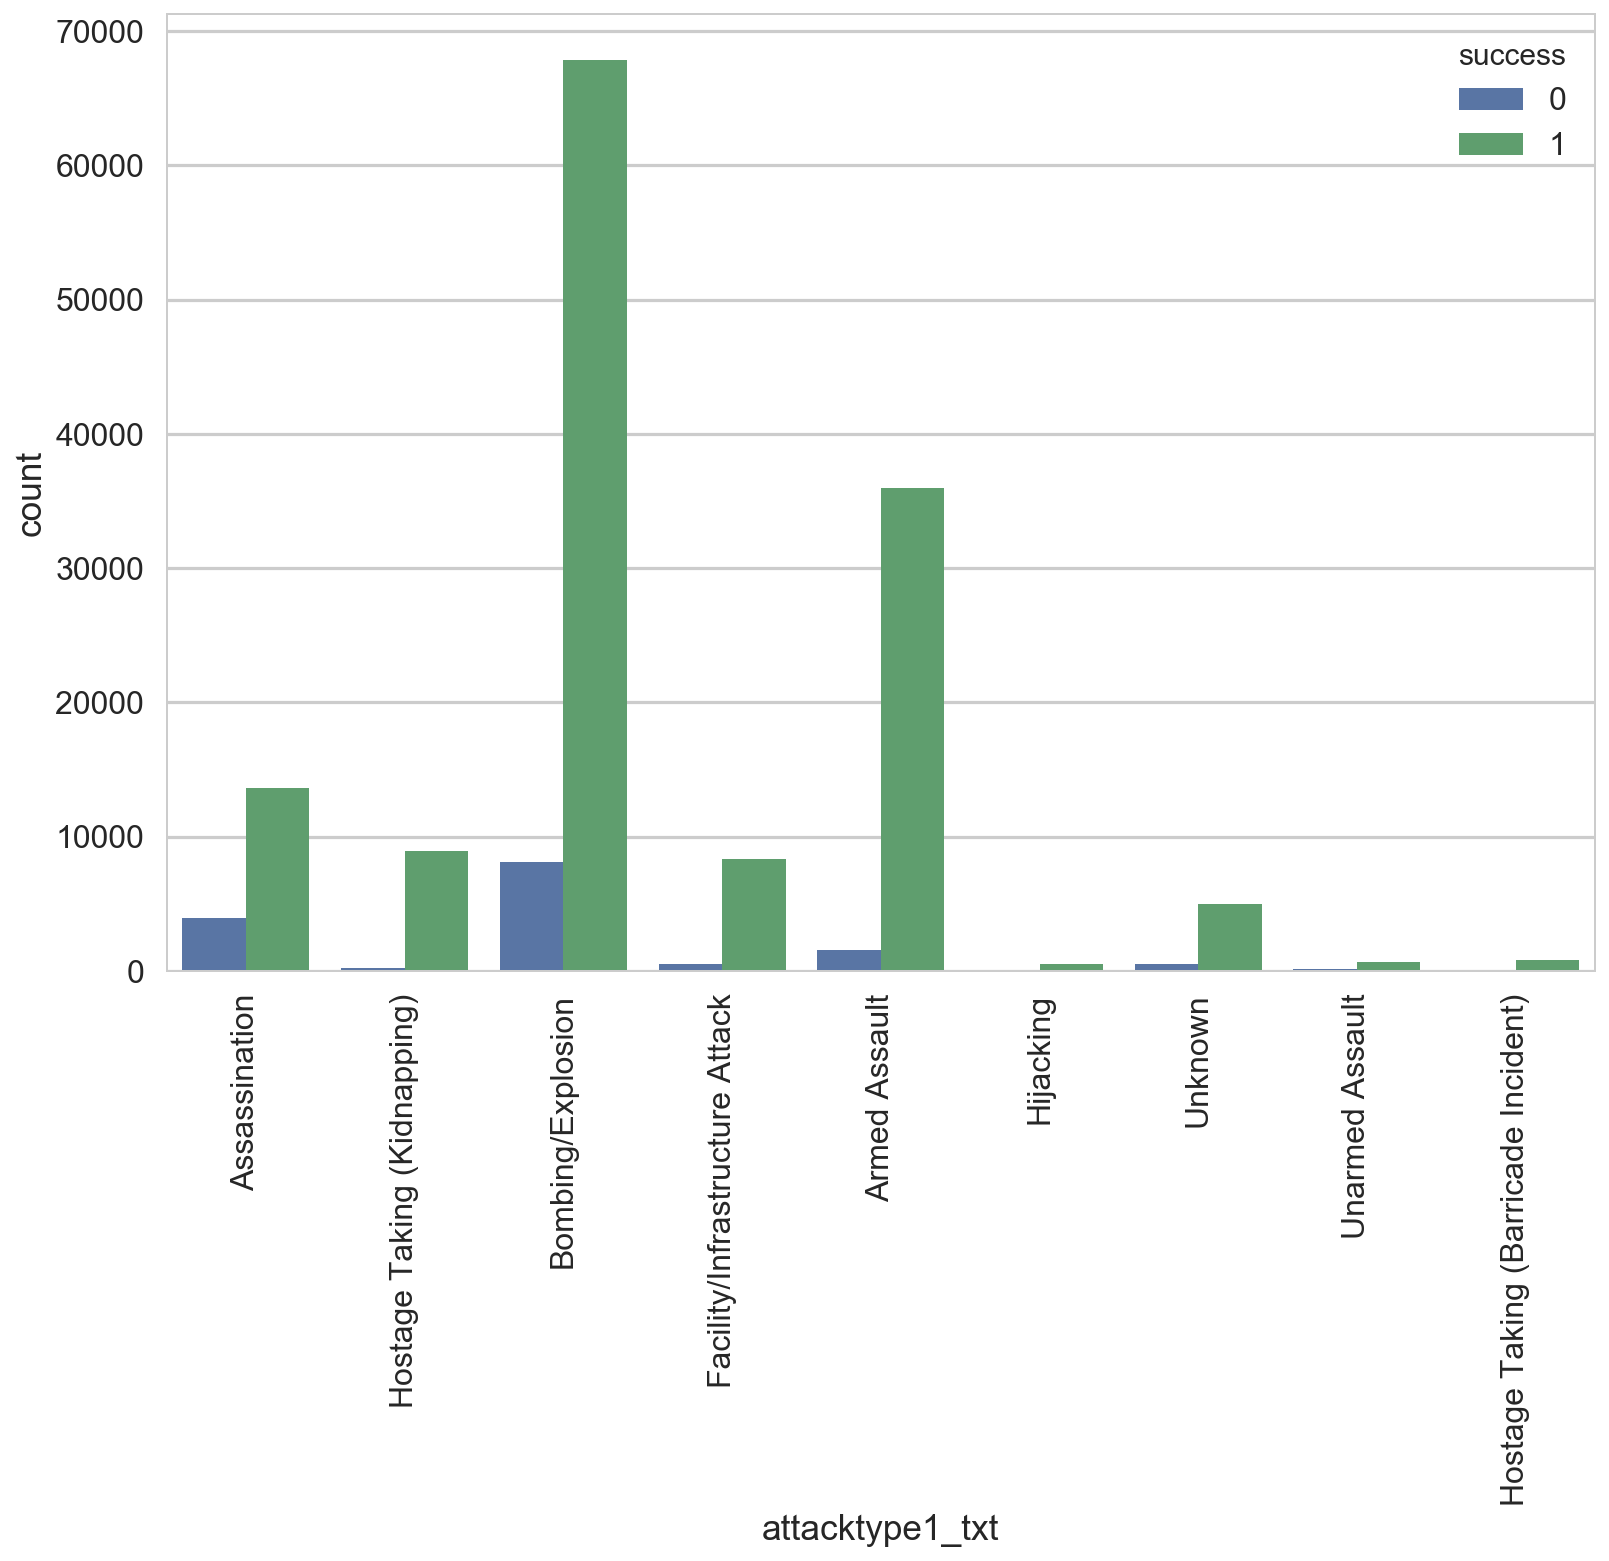

In [13]:
sns.countplot(gt.attacktype1_txt, hue=gt.success)
plt.xticks(rotation = 90)

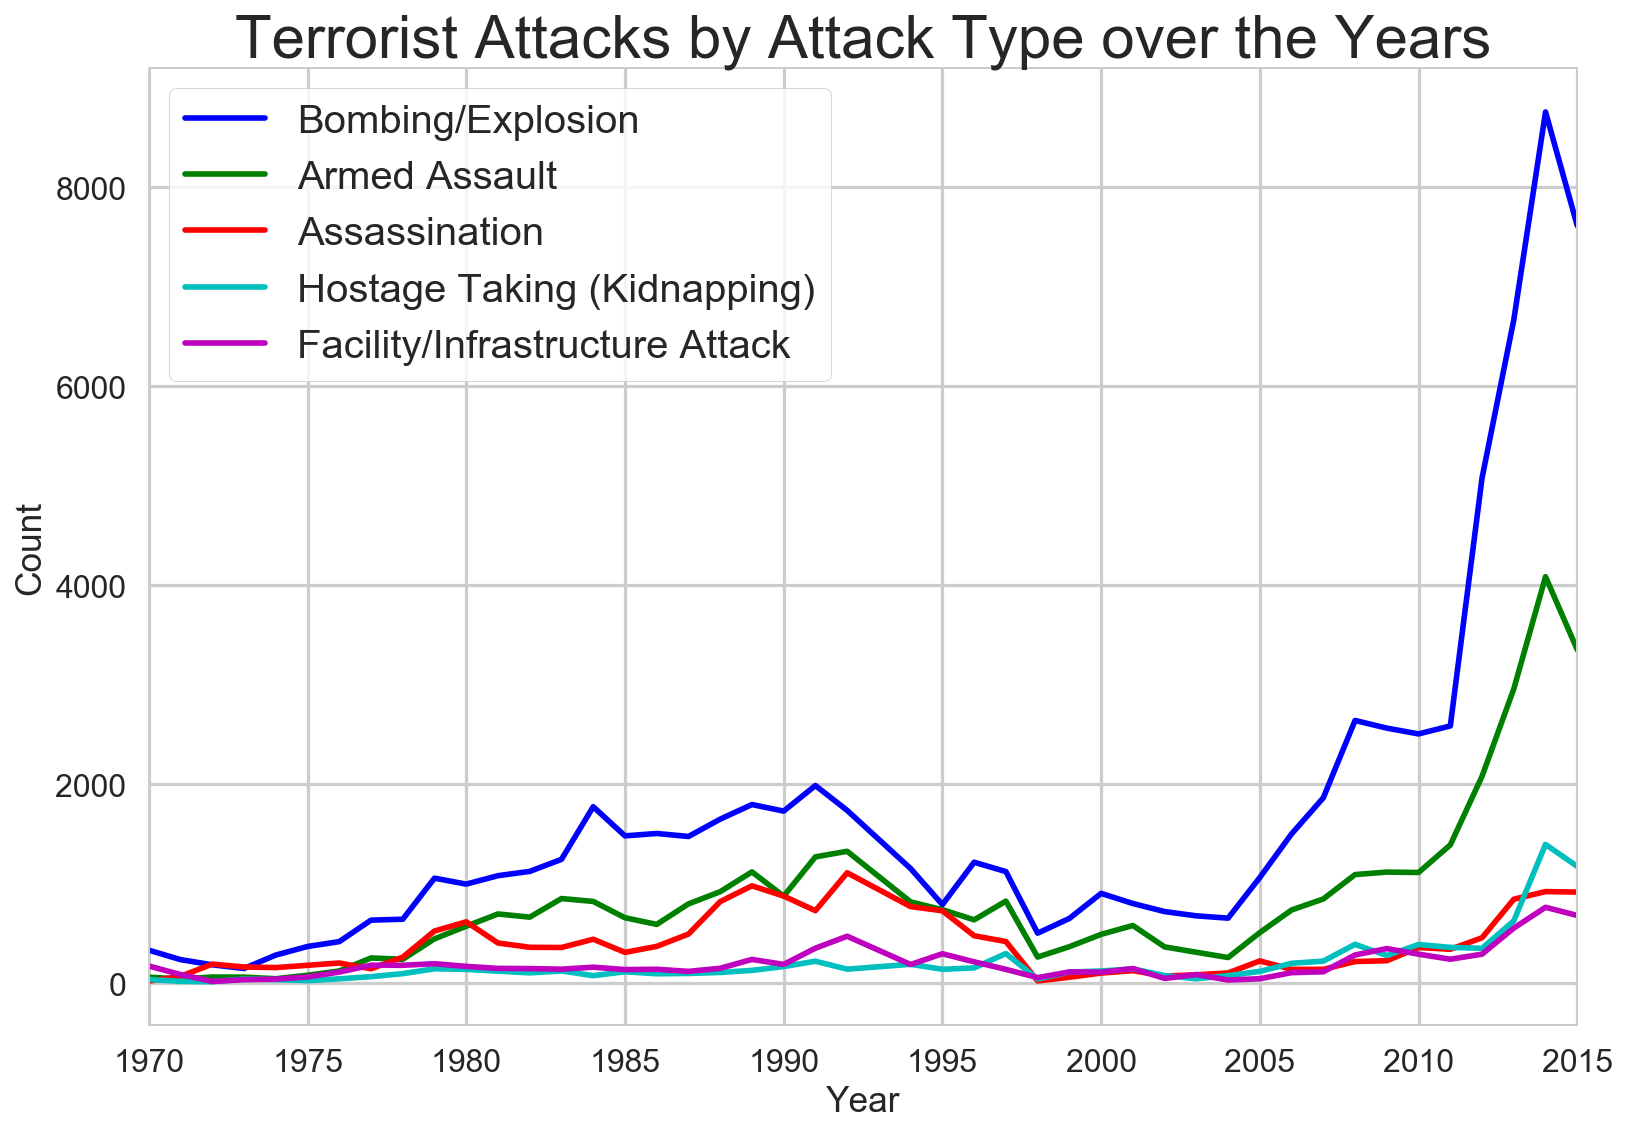

In [14]:
# attacks by attacktype
labels = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, j in enumerate(gt.groupby('attacktype1_txt').eventid.count().sort_values(ascending=False).index[0:5]):
    gt[gt.attacktype1_txt == j].groupby('iyear')['attacktype1_txt'].count().plot(c=colors[i])
    labels.append(j)
plt.legend(loc=2, fontsize=20, frameon=True, fancybox=True, labels=labels)
plt.title('Terrorist Attacks by Attack Type over the Years', fontsize=30)
plt.xlabel('Year')
plt.ylabel('Count')
# plt.savefig('../images/attacks-by-group-line.png')

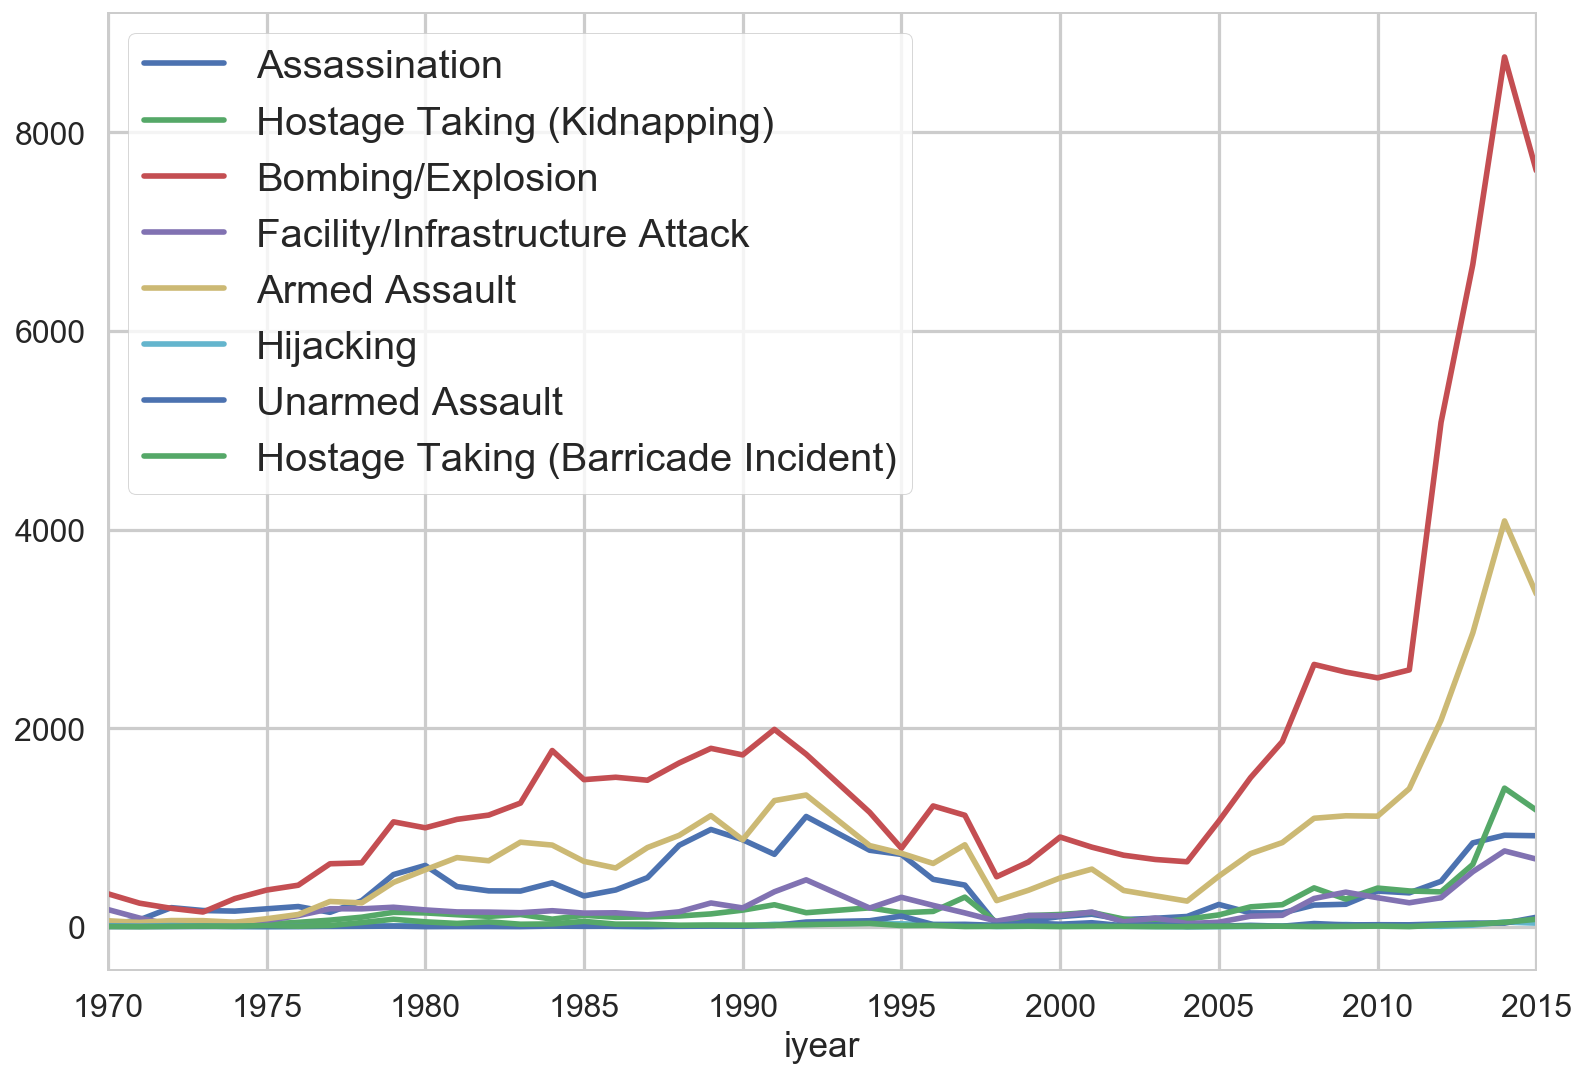

In [15]:
# attacks by attack type
labels = []
for i in gt[gt.attacktype1_txt != 'Unknown'].attacktype1_txt.unique():
    gt[gt.attacktype1_txt == i].groupby('iyear')['attacktype1_txt'].count().plot()
    labels.append(i)
plt.legend(loc=2, fontsize=20, frameon=True, fancybox=True, labels=labels)

## Attacks by Region

In [16]:
gt.groupby('region_txt').eventid.count().sort_values(ascending=False)

region_txt
Middle East & North Africa     40422
South Asia                     37841
South America                  18628
Western Europe                 16020
Sub-Saharan Africa             13434
Southeast Asia                 10360
Central America & Caribbean    10337
Eastern Europe                  4892
North America                   3268
East Asia                        786
Central Asia                     538
Australasia & Oceania            246
Name: eventid, dtype: int64

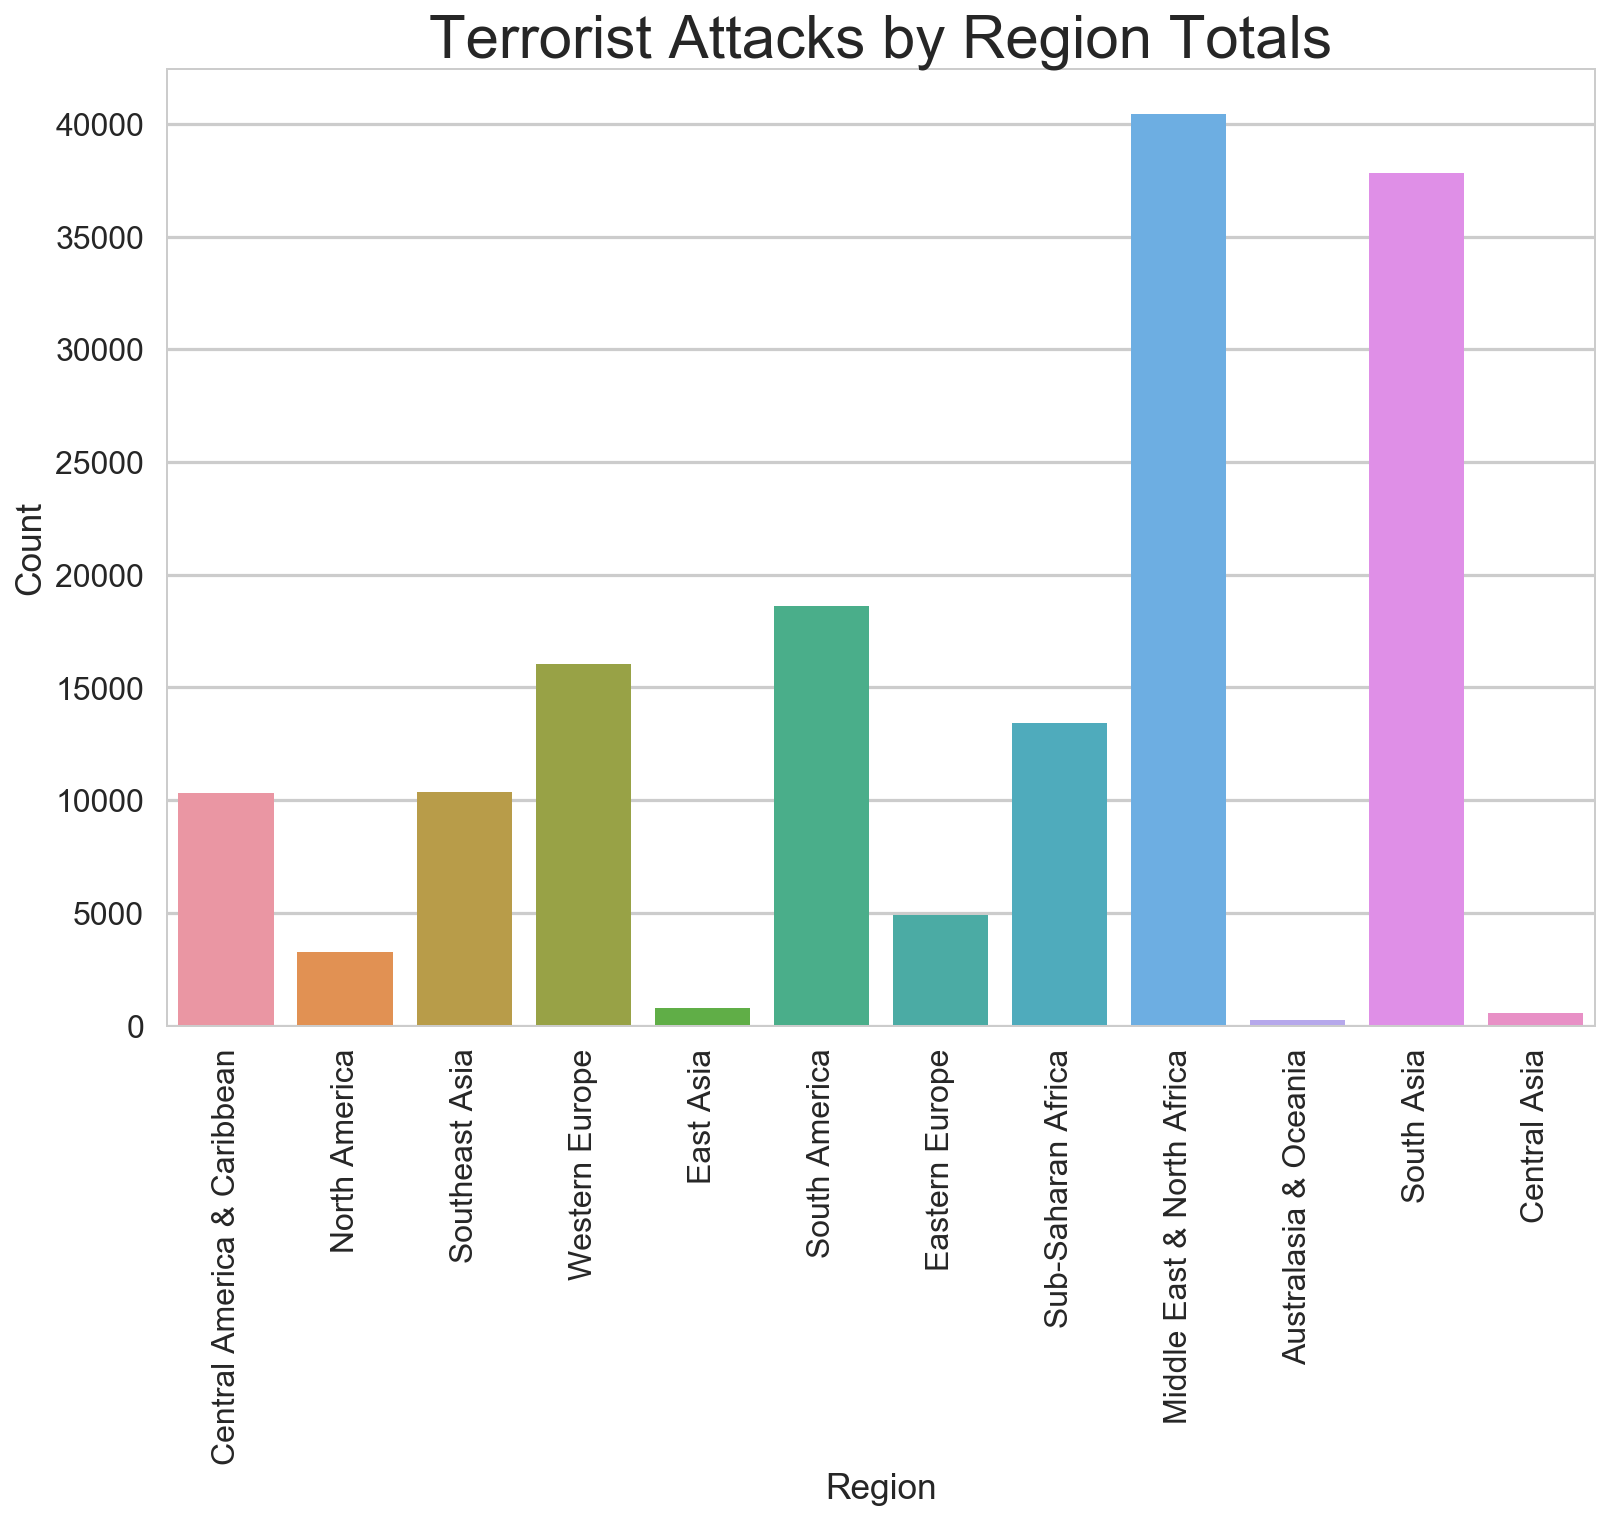

In [17]:
sns.countplot(gt.region_txt)
plt.xticks(rotation = 90)
plt.title('Terrorist Attacks by Region Totals', fontsize=30)
plt.xlabel('Region')
plt.ylabel('Count')
plt.savefig('../images/attacks-region-bar.png')

In [18]:
print len(gt[(gt.region_txt.str.contains('Middle East')) | (gt.region_txt.str.contains('South Asia'))])
print len(gt) - len(gt[(gt.region_txt.str.contains('Middle East')) | (gt.region_txt.str.contains('South Asia'))])

78263
78509


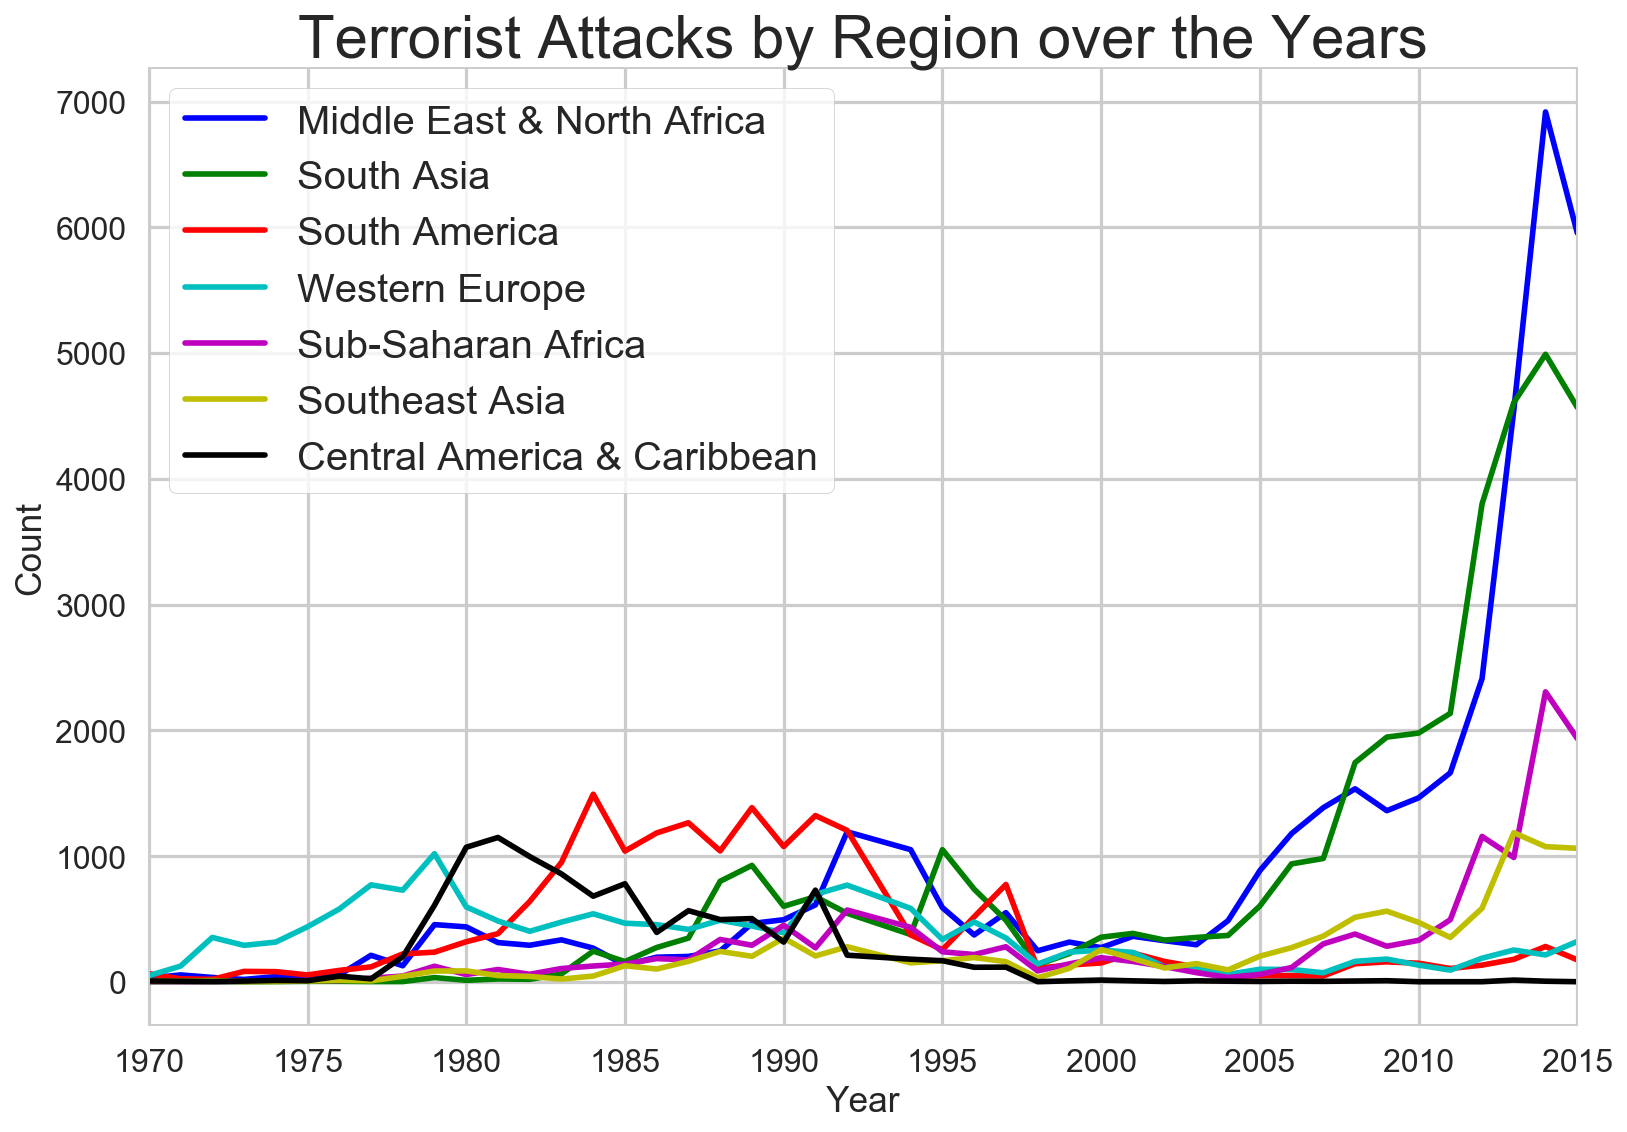

In [19]:
# attacks by region
labels = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, j in enumerate(gt.groupby('region_txt').eventid.count().sort_values(ascending=False).index[0:7]):
    gt[gt.region_txt == j].groupby('iyear')['region_txt'].count().plot(c=colors[i])
    labels.append(j)
plt.legend(loc=2, fontsize=20, frameon=True, fancybox=True, labels=labels)
plt.title('Terrorist Attacks by Region over the Years', fontsize=30)
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('../images/attacks-by-region-line.png')

In [20]:
print len(gt[gt.iyear > 2010])
print len(gt[gt.iyear <= 2010])

57201
99571


## Attack Type, Number Killed

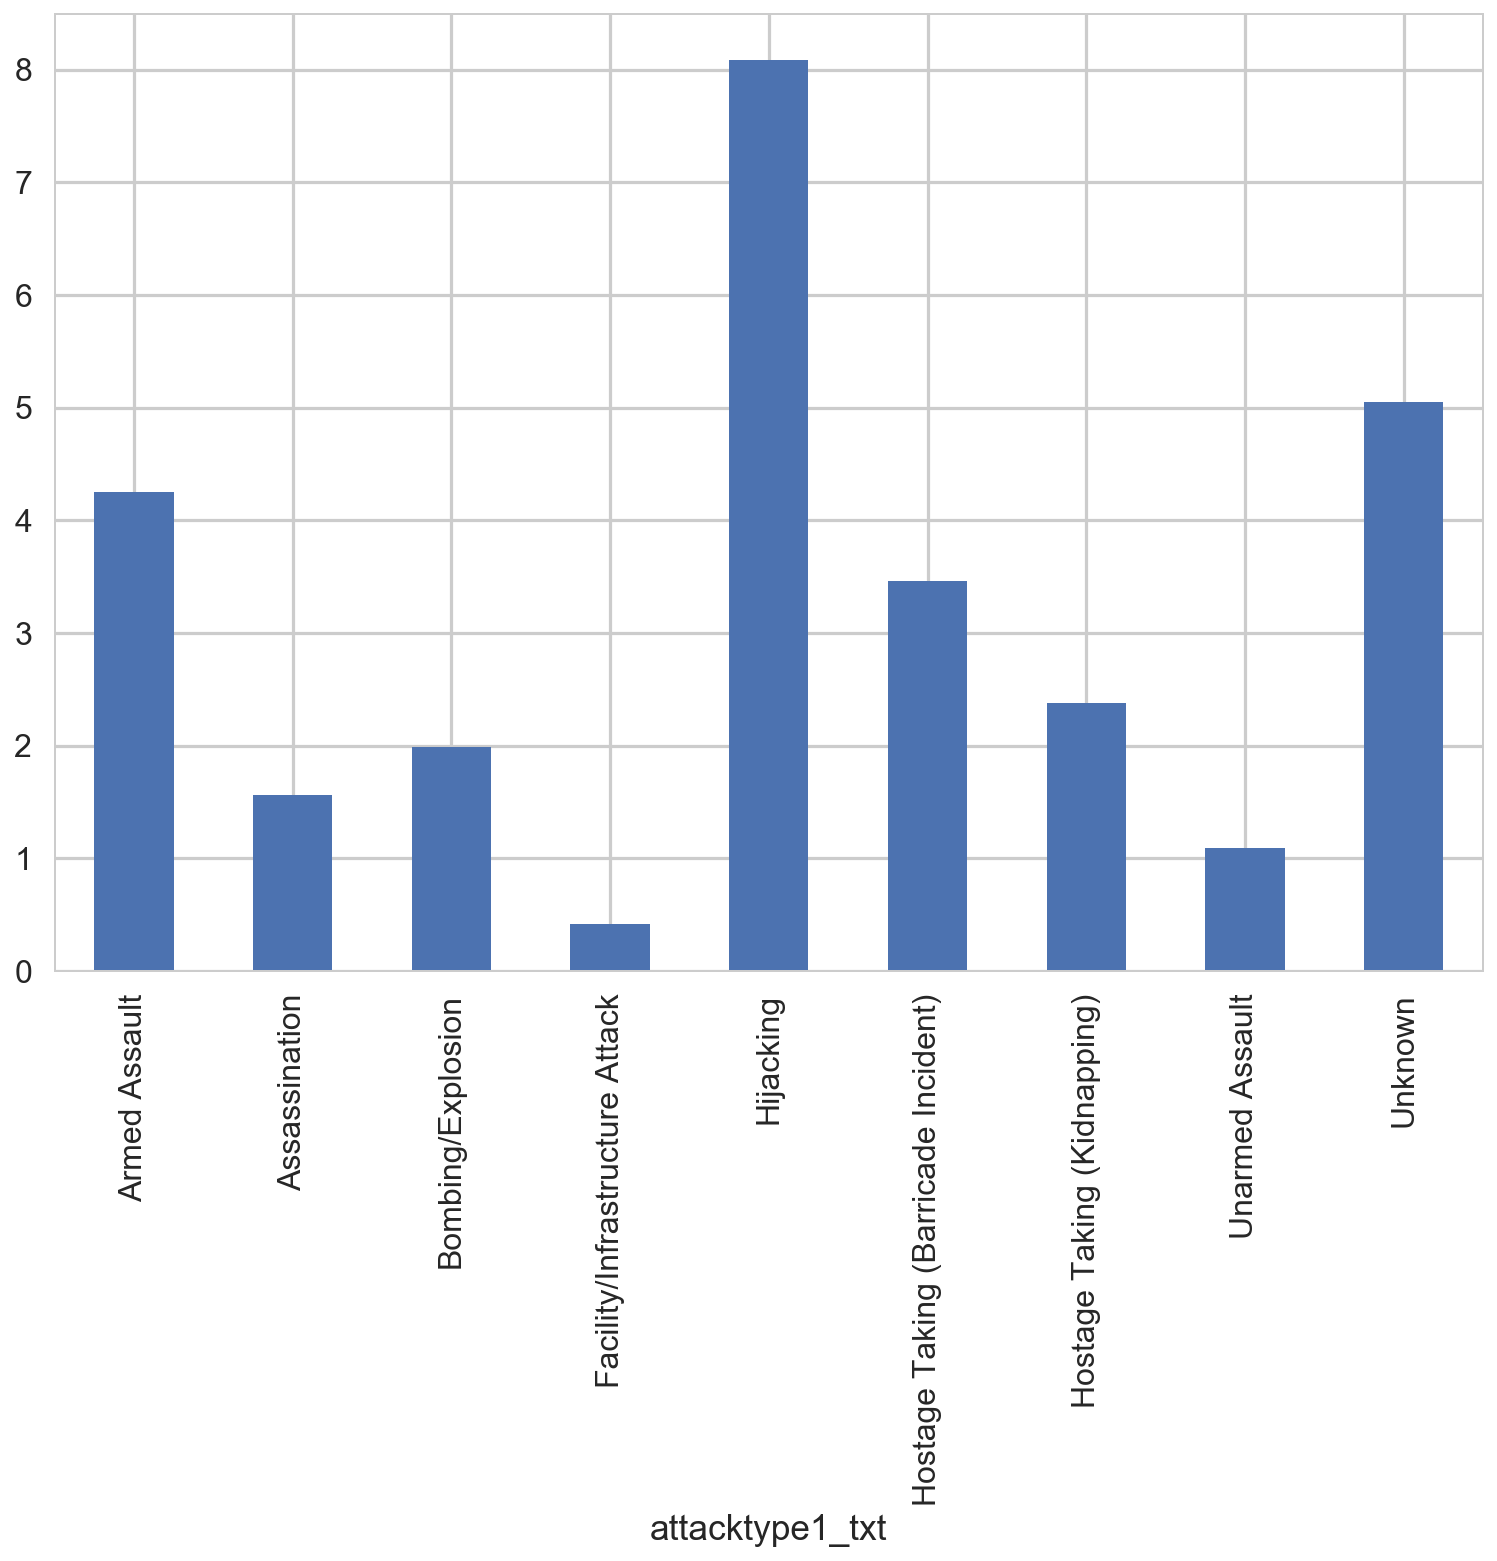

In [21]:
# average
gt[(gt.nkill.notnull()) & (gt.success == 1)].groupby('attacktype1_txt').nkill.mean().plot(kind='bar')

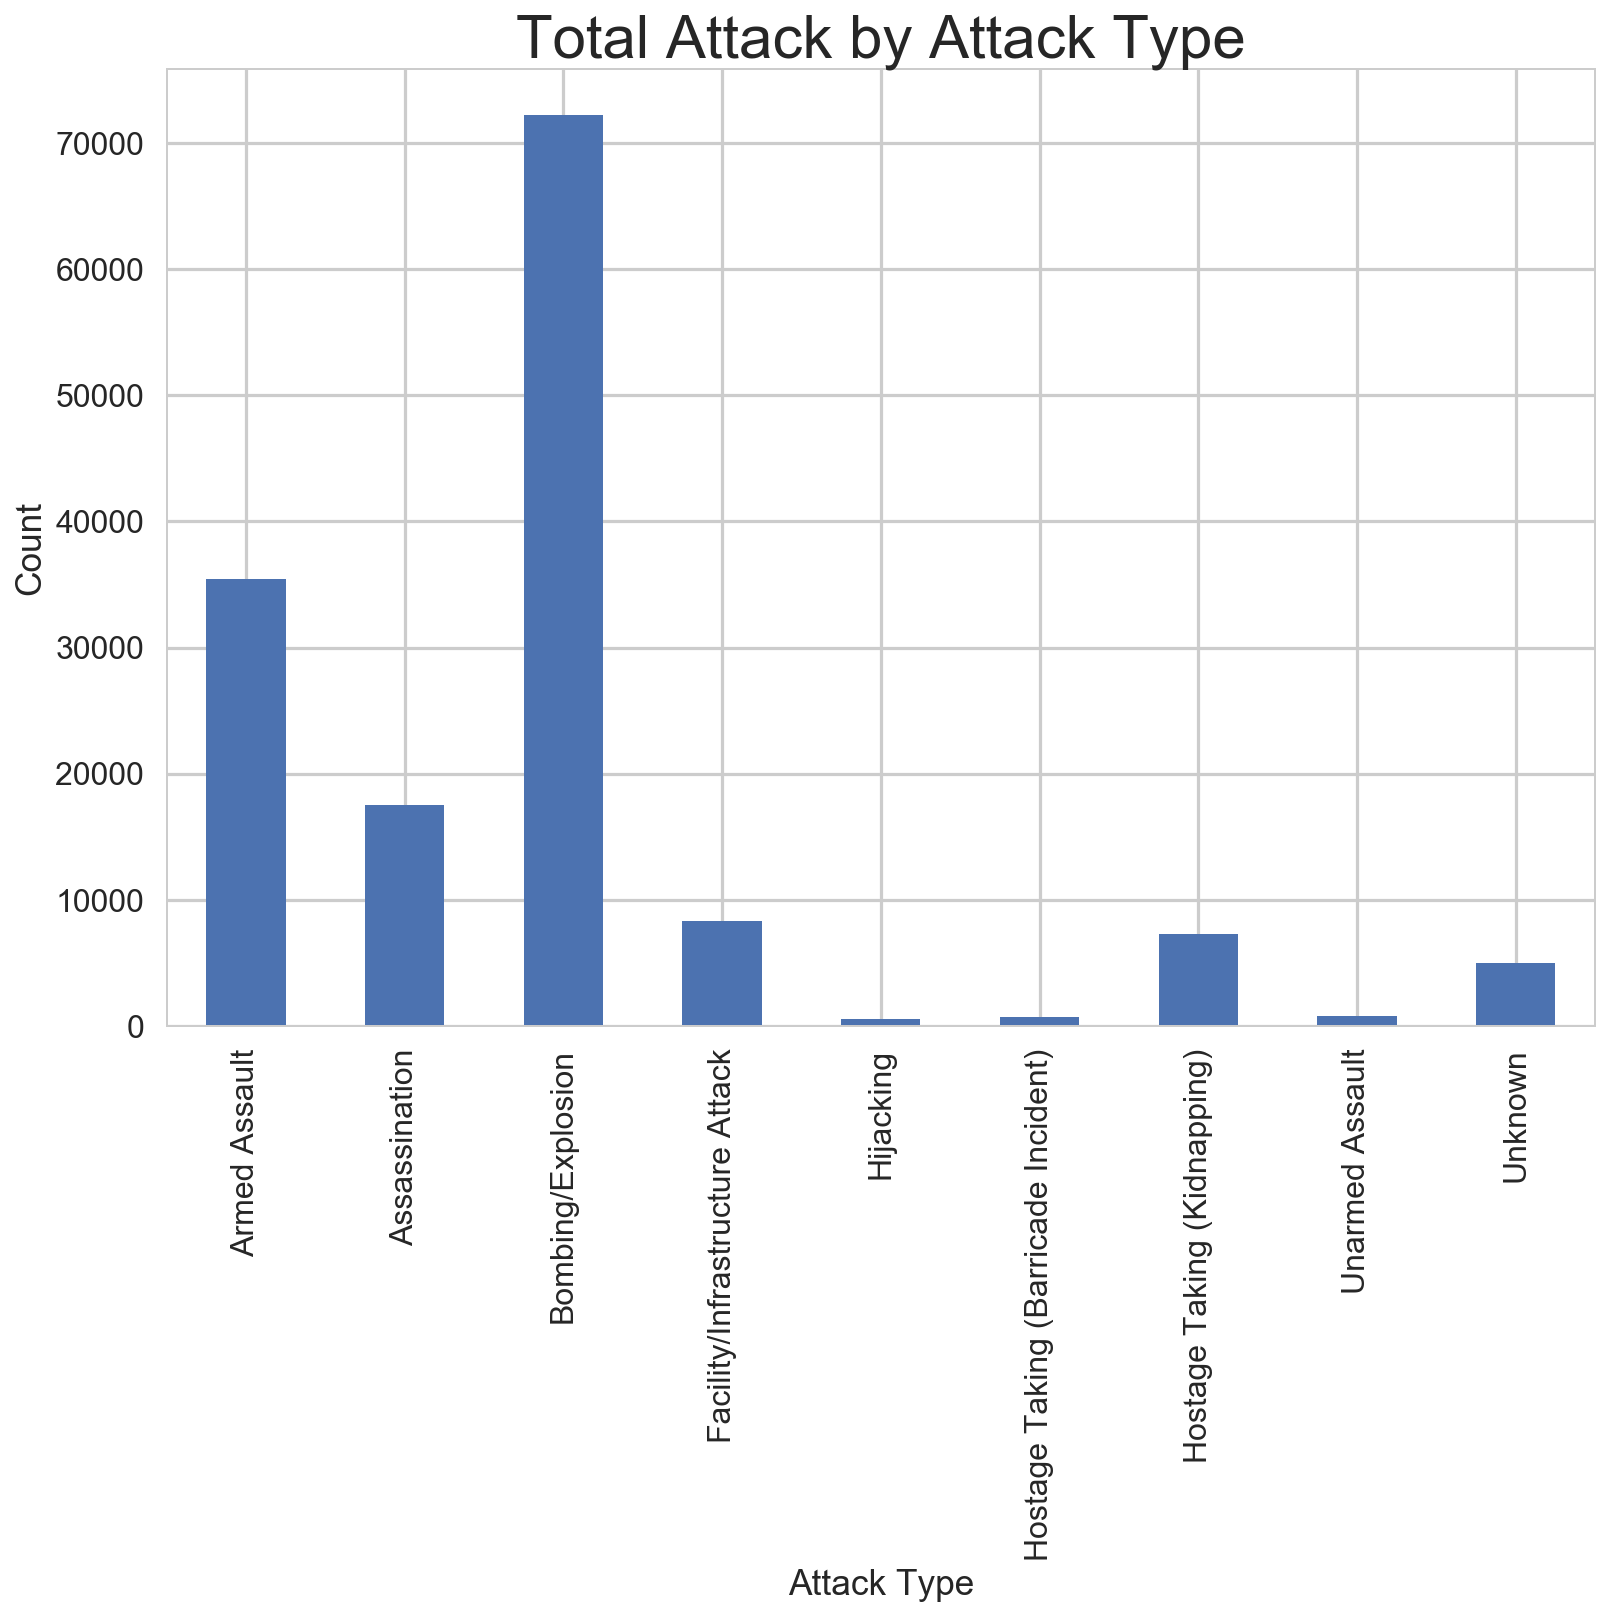

In [22]:
# total
gt[(gt.nkill.notnull())].groupby('attacktype1_txt').nkill.count().plot(kind='bar')
plt.title('Total Attack by Attack Type', fontsize=30)
plt.xlabel('Attack Type')
plt.ylabel('Count')

In [23]:
print len(gt[(gt.attacktype1_txt == 'Bombing/Explosion') | (gt.attacktype1_txt == 'Armed Assault')])
print len(gt[(gt.attacktype1_txt == 'Bombing/Explosion') | (gt.attacktype1_txt == 'Armed Assault')]) / float(len(gt))

113517
0.724089760927


In [24]:
gt[gt.nkill.notnull()].groupby('attacktype1_txt').nkill.max()

attacktype1_txt
Armed Assault                          1180.0
Assassination                            54.0
Bombing/Explosion                       329.0
Facility/Infrastructure Attack          422.0
Hijacking                              1381.5
Hostage Taking (Barricade Incident)     200.0
Hostage Taking (Kidnapping)            1500.0
Unarmed Assault                         200.0
Unknown                                 375.0
Name: nkill, dtype: float64

In [25]:
gt[(gt.attacktype1_txt == 'Hijacking') & (gt.nkill > 100)]

eventid  iyear  imonth  iday approxdate  extended resolution  \
23488  200109110004   2001       9    11        NaN         0        NaN   
23489  200109110005   2001       9    11        NaN         0        NaN   
23490  200109110006   2001       9    11        NaN         0        NaN   

       country    country_txt  region     region_txt provstate           city  \
23488      217  United States       1  North America  New York  New York City   
23489      217  United States       1  North America  New York  New York City   
23490      217  United States       1  North America  Virginia      Arlington   

        latitude  longitude  specificity  vicinity location  \
23488  40.712784 -74.005941            1         0      NaN   
23489  40.712784 -74.005941            1         0      NaN   
23490  38.880777 -77.108273            1         0      NaN   

                                                 summary  crit1  crit2  crit3  \
23488  09/11/2001: This was one of four related terro...      1      1      1   
23489  09/11/2001: This was one of four related terro...      1      1      1   
23490  09/11/2001: This was one of four related terro...      1      1      1   

       doubtterr  alternative alternative_txt  multiple  success  suicide  \
23488        0.0          NaN               .         1        1        1   
23489        0.0          NaN               .         1        1        1   
23490        0.0          NaN               .         1        1        1   

       attacktype1 attacktype1_txt  attacktype2 attacktype2_txt  attacktype3  \
23488            4       Hijacking          2.0   Armed Assault          NaN   
23489            4       Hijacking          2.0   Armed Assault          NaN   
23490            4       Hijacking          2.0   Armed Assault          NaN   

      attacktype3_txt  targtype1                targtype1_txt  targsubtype1  \
23488               .         14  Private Citizens & Property          67.0   
23489               .         14  Private Citizens & Property          67.0   
23490               .          2         Government (General)          21.0   

                          targsubtype1_txt      corp1  \
23488         Unnamed Civilian/Unspecified  Civilians   
23489         Unnamed Civilian/Unspecified  Civilians   
23490  Government Building/Facility/Office  Civilians   

                                                 target1  natlty1  \
23488  Passengers and crew members on American Airlin...    217.0   
23489  Passengers and crew members on United Airlines...    217.0   
23490  Passengers and crew members on American Airlin...    217.0   

         natlty1_txt  targtype2 targtype2_txt  targsubtype2  \
23488  United States        1.0      Business           3.0   
23489  United States        1.0      Business           3.0   
23490  United States        4.0      Military          27.0   

                                    targsubtype2_txt  \
23488                                  Bank/Commerce   
23489                                  Bank/Commerce   
23490  Military Barracks/Base/Headquarters/Checkpost   

                                     corp2  \
23488           World Trade Center Complex   
23489           World Trade Center Complex   
23490  United States Department of Defense   

                                           target2  natlty2    natlty2_txt  \
23488  Businesses operating inside the Twin Towers    217.0  United States   
23489  Businesses operating inside the Twin Towers    217.0  United States   
23490                                 The Pentagon    217.0  United States   

       targtype3        targtype3_txt  targsubtype3  \
23488        6.0  Airports & Aircraft          42.0   
23489        6.0  Airports & Aircraft          42.0   
23490        6.0  Airports & Aircraft          42.0   

                   targsubtype3_txt              corp3  \
23488  Aircraft (not at an airport)  American Airlines   
23489  Aircraft (not at an airport)   

In [26]:
print gt[(gt.nkill > 0)].attacktype1_txt.value_counts()
print
print gt[(gt.nkill > 0)].groupby('attacktype1_txt').nkill.mean()

Armed Assault                          25164
Bombing/Explosion                      25073
Assassination                          13754
Unknown                                 3166
Hostage Taking (Kidnapping)             2789
Facility/Infrastructure Attack           519
Hostage Taking (Barricade Incident)      184
Unarmed Assault                          153
Hijacking                                109
Name: attacktype1_txt, dtype: int64

attacktype1_txt
Armed Assault                           5.773624
Assassination                           1.682153
Bombing/Explosion                       5.155989
Facility/Infrastructure Attack          6.368035
Hijacking                              33.559633
Hostage Taking (Barricade Incident)    13.750000
Hostage Taking (Kidnapping)             6.043474
Unarmed Assault                         4.888889
Unknown                                 7.568806
Name: nkill, dtype: float64


## Attacks by Year

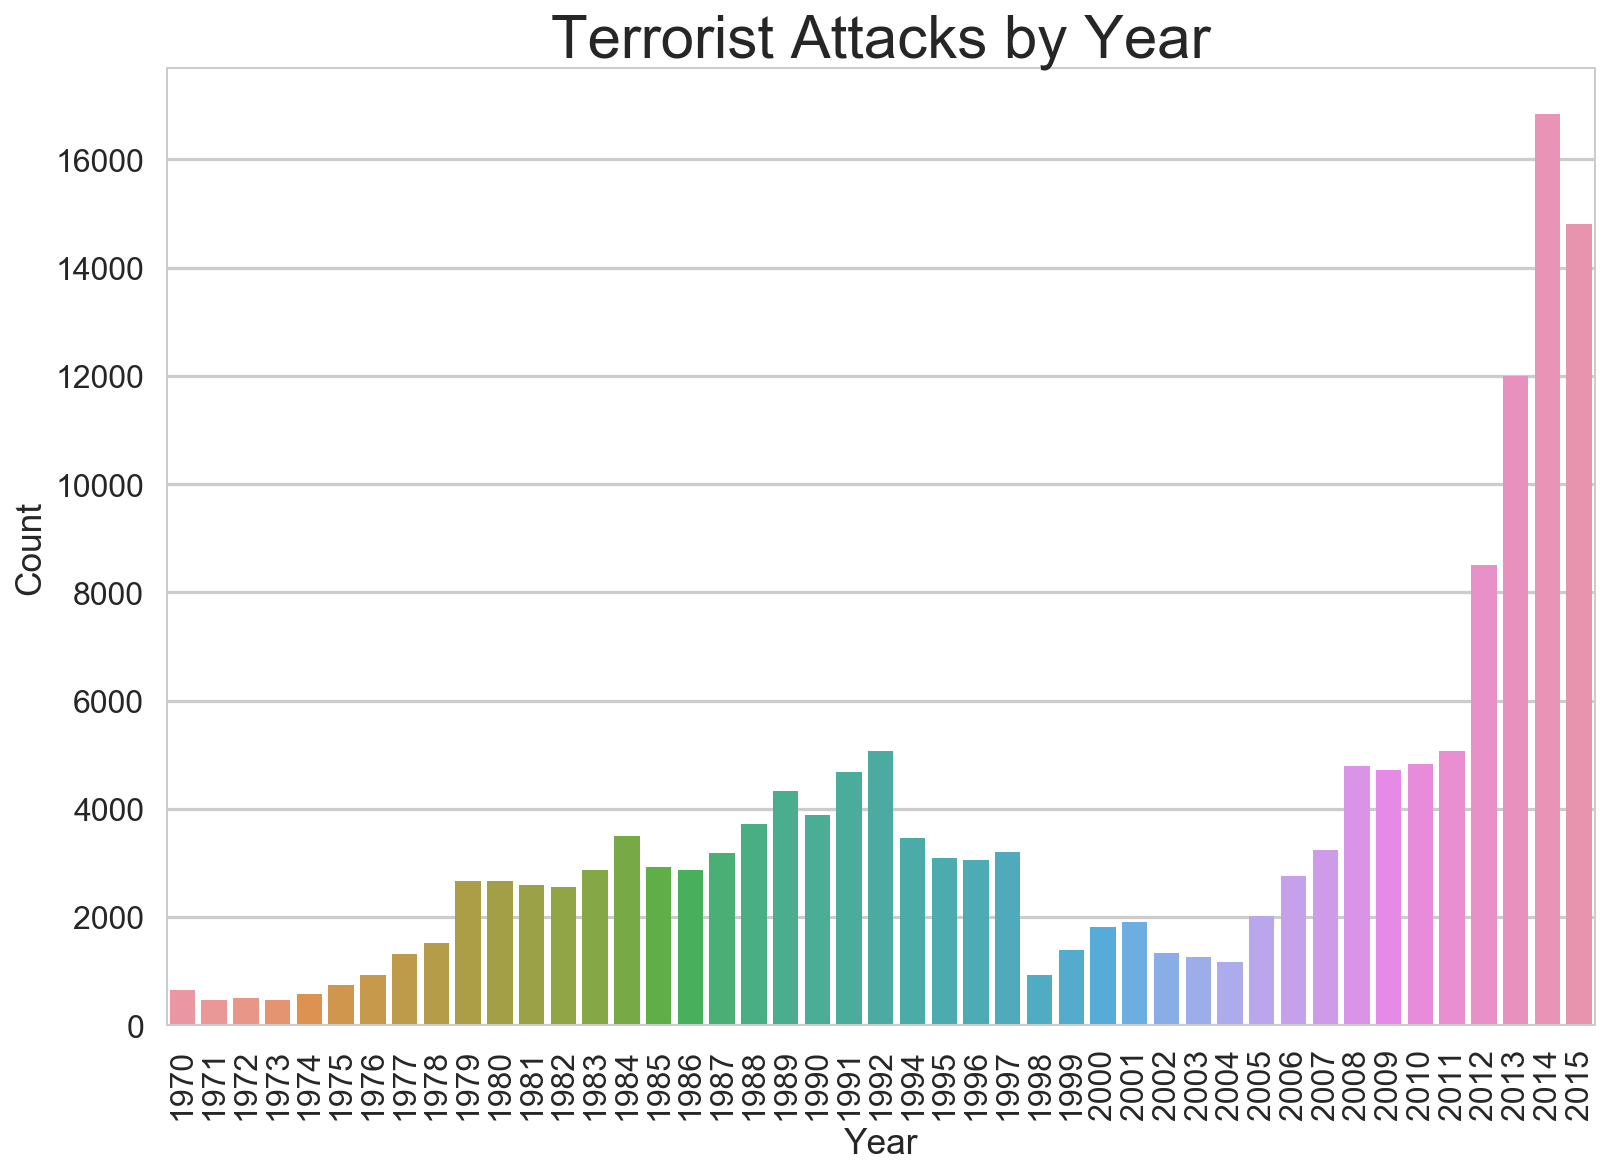

In [27]:
sns.countplot(gt.iyear)
plt.xticks(rotation=90)
plt.title('Terrorist Attacks by Year', fontsize=30)
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('../images/attacks-by-year-bar.png')

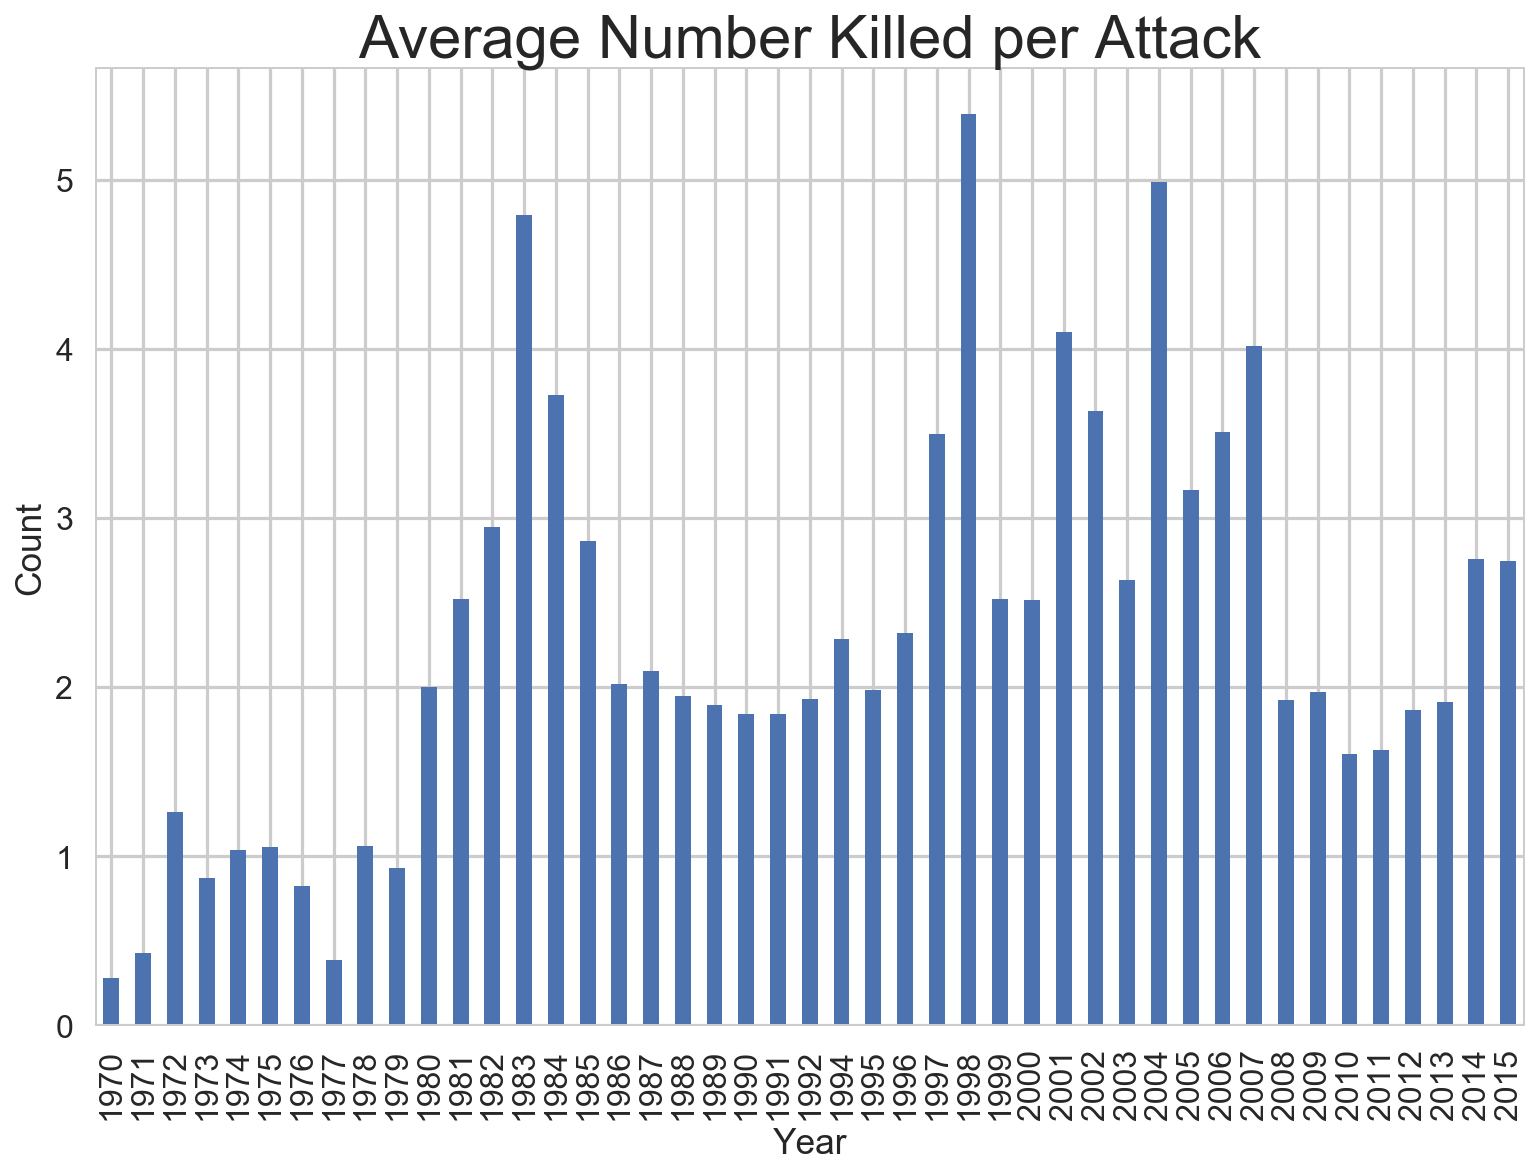

In [28]:
# average number killed by year
gt[(gt.nkill.notnull())].groupby('iyear').nkill.mean().plot(kind='bar')
plt.title('Average Number Killed per Attack', fontsize=30)
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('../images/avg-nkill-per-attack-bar.png')

## Attacks by Country

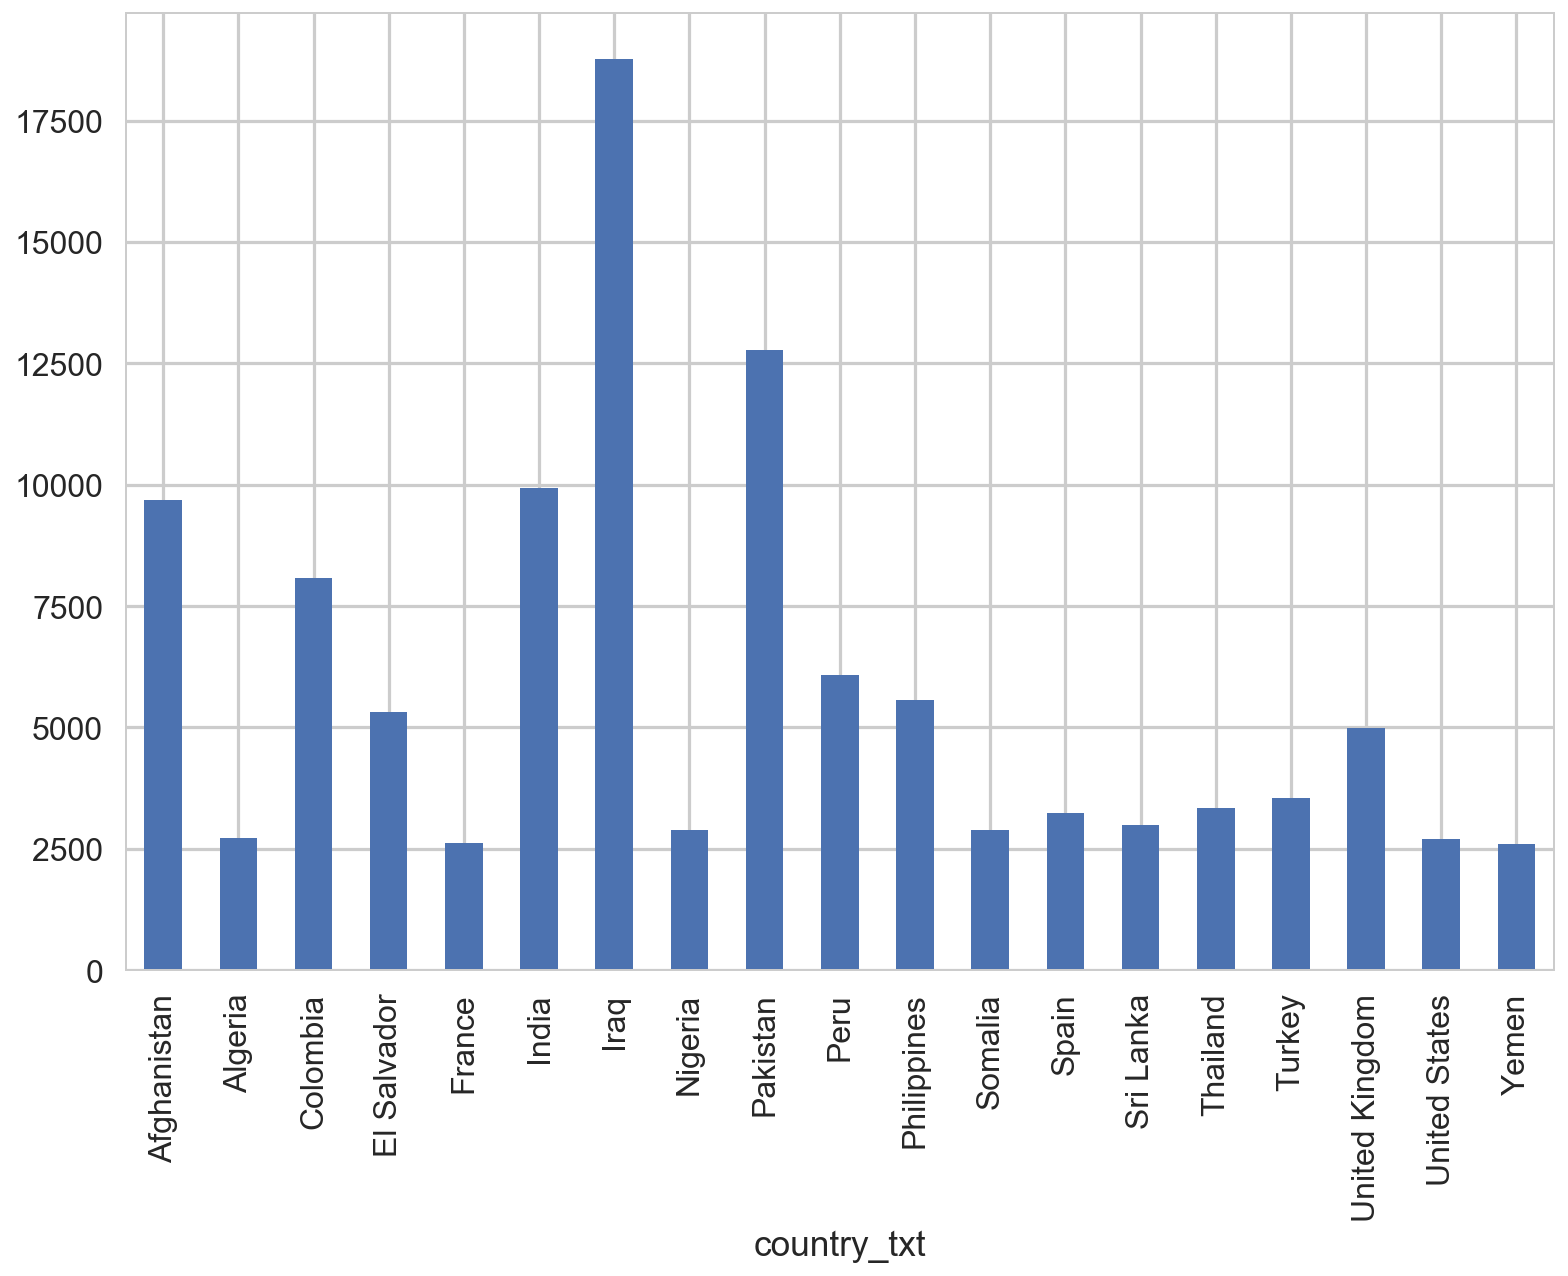

In [29]:
gt.groupby('country_txt')['eventid'].count()[gt.groupby('country_txt')['eventid'].count() >= 2500].plot(kind='bar')

In [30]:
gt.groupby('country_txt')['nkill'].sum().sort_values(ascending=False)[0:5]

country_txt
Iraq           58855.0
Afghanistan    27018.0
Pakistan       21597.0
Nigeria        18509.0
India          18317.0
Name: nkill, dtype: float64

In [31]:
gt.groupby('gname')['nkill'].sum().sort_values(ascending=False)[1:6]

gname
Taliban                                        19465.00
Islamic State of Iraq and the Levant (ISIL)    19224.33
Boko Haram                                     17093.00
Shining Path (SL)                              11588.00
Liberation Tigers of Tamil Eelam (LTTE)        10964.00
Name: nkill, dtype: float64

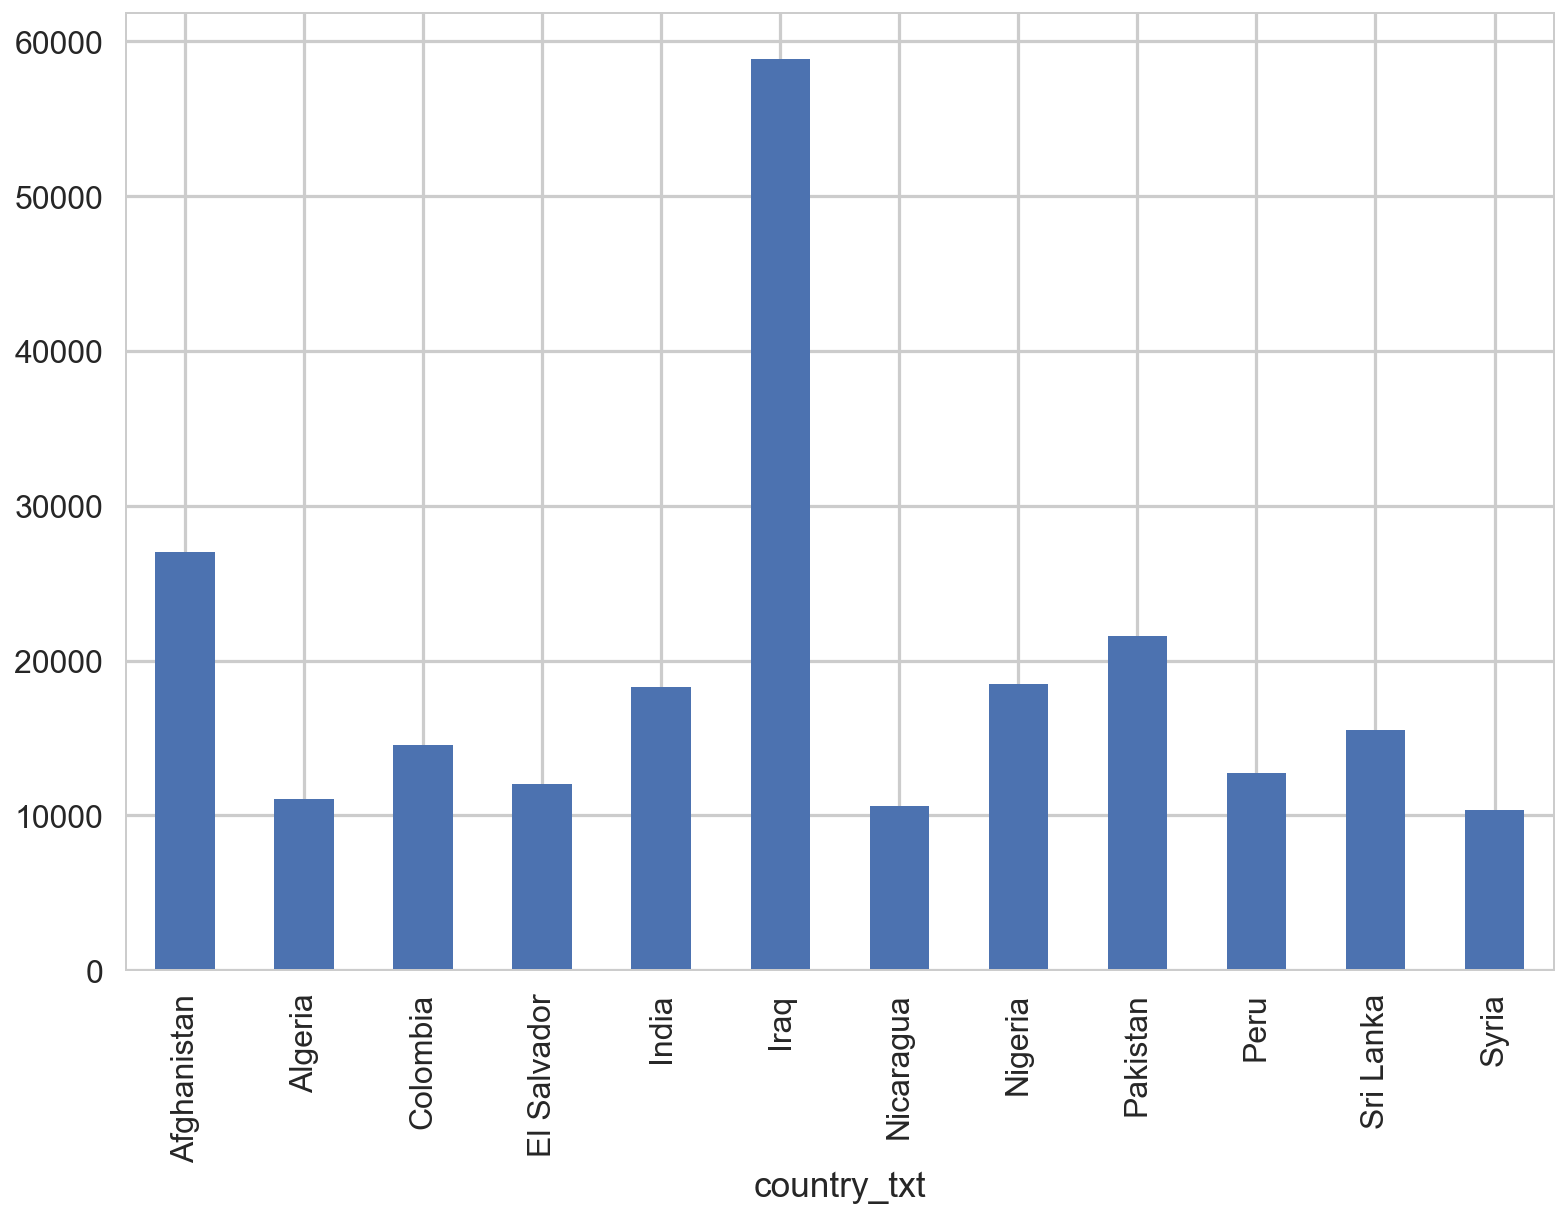

In [32]:
gt.groupby('country_txt')['nkill'].sum()[gt.groupby('country_txt')['nkill'].sum() >= 10000].plot(kind='bar')

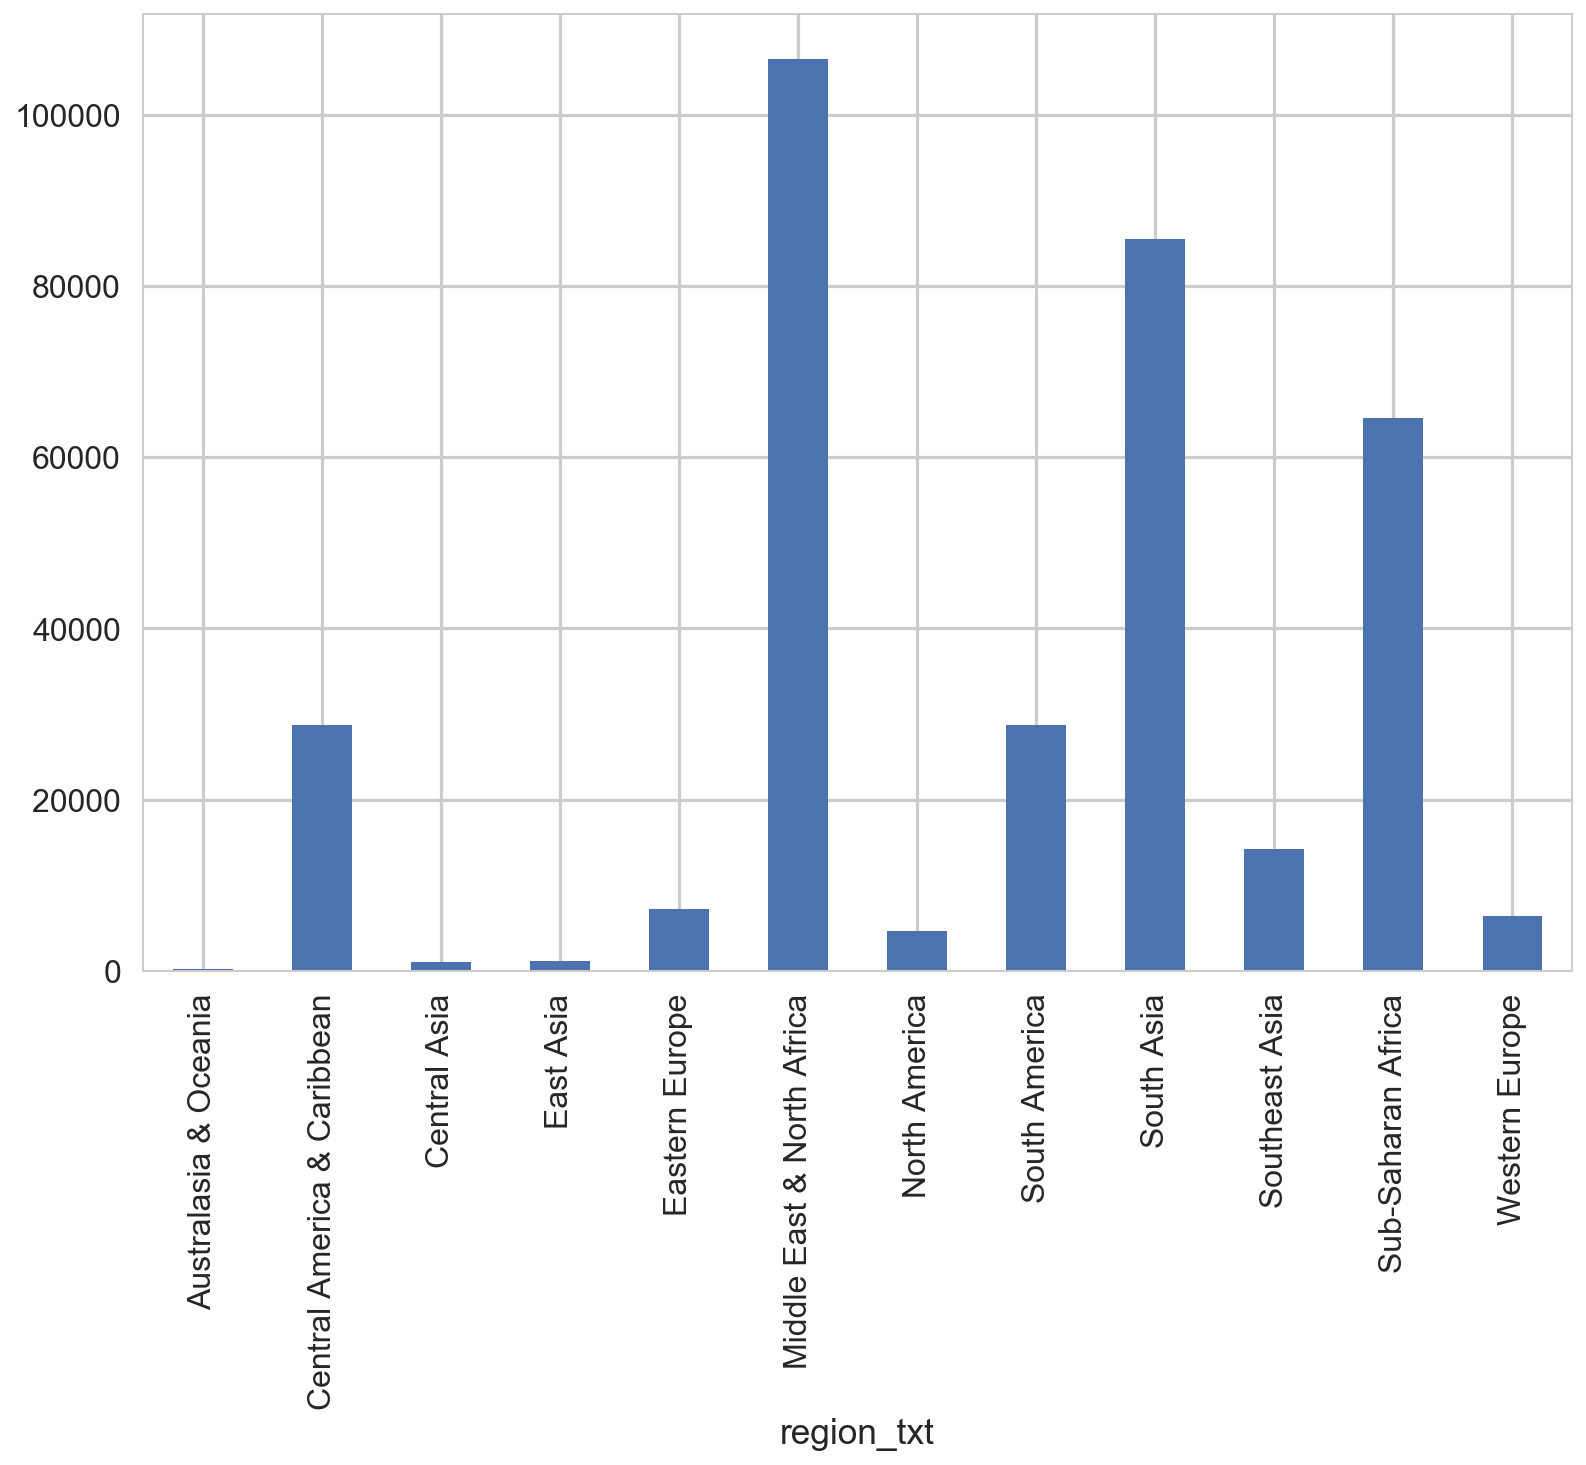

In [33]:
# total number killed by region
gt[(gt.nkill.notnull())].groupby('region_txt').nkill.sum().plot(kind='bar')

## Attacks by Group

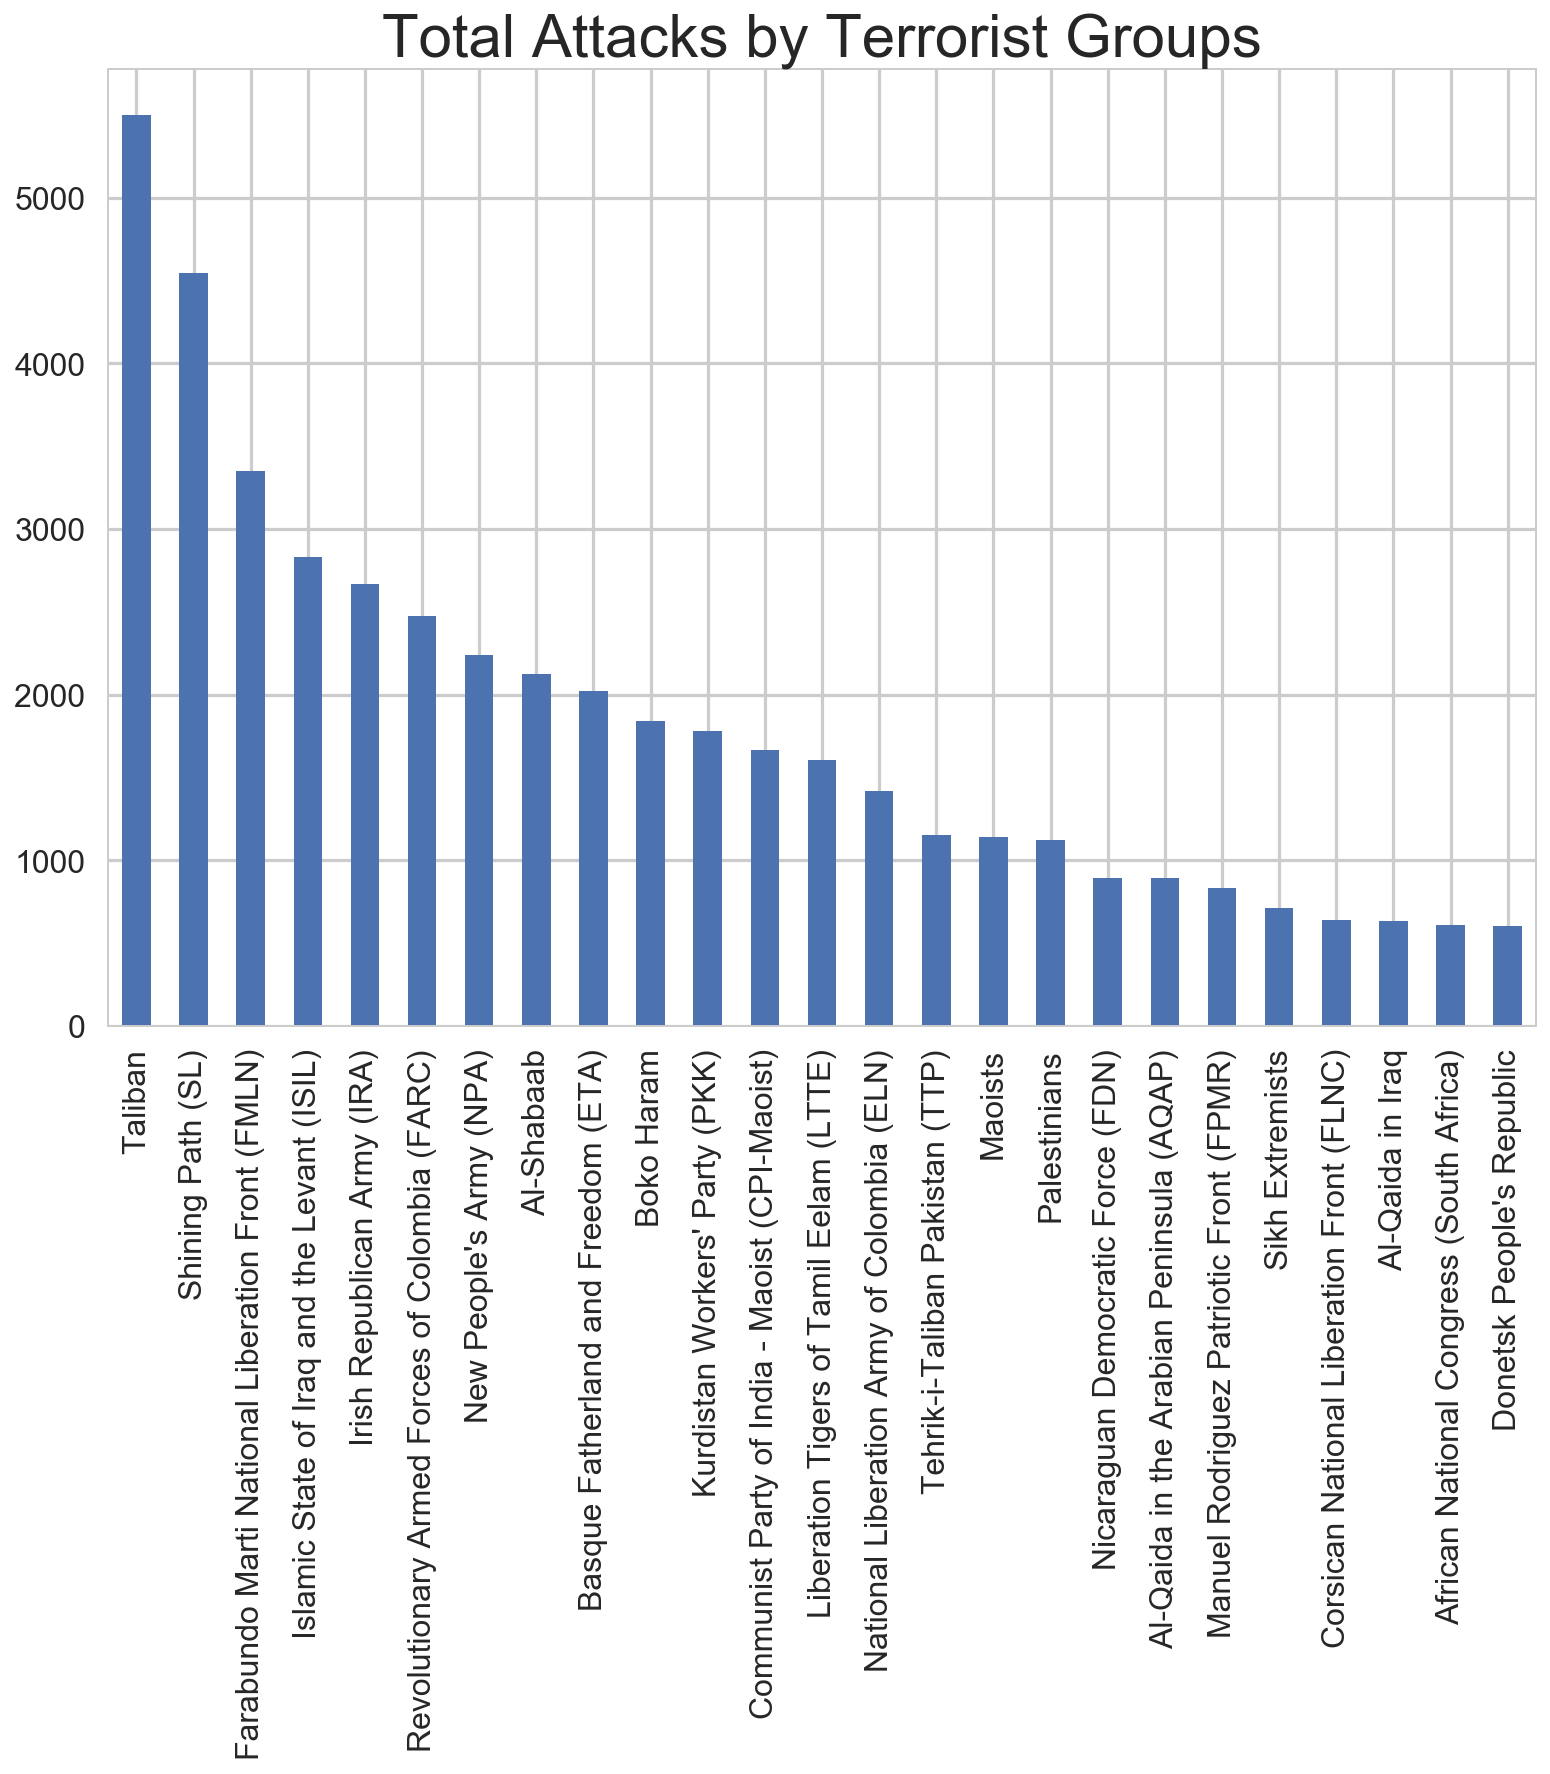

In [34]:
# most attacks by group
gt.gname.value_counts()[1:26].plot(kind='bar')
plt.title('Total Attacks by Terrorist Groups', fontsize=30)


In [35]:
gt.gname.nunique()

3290

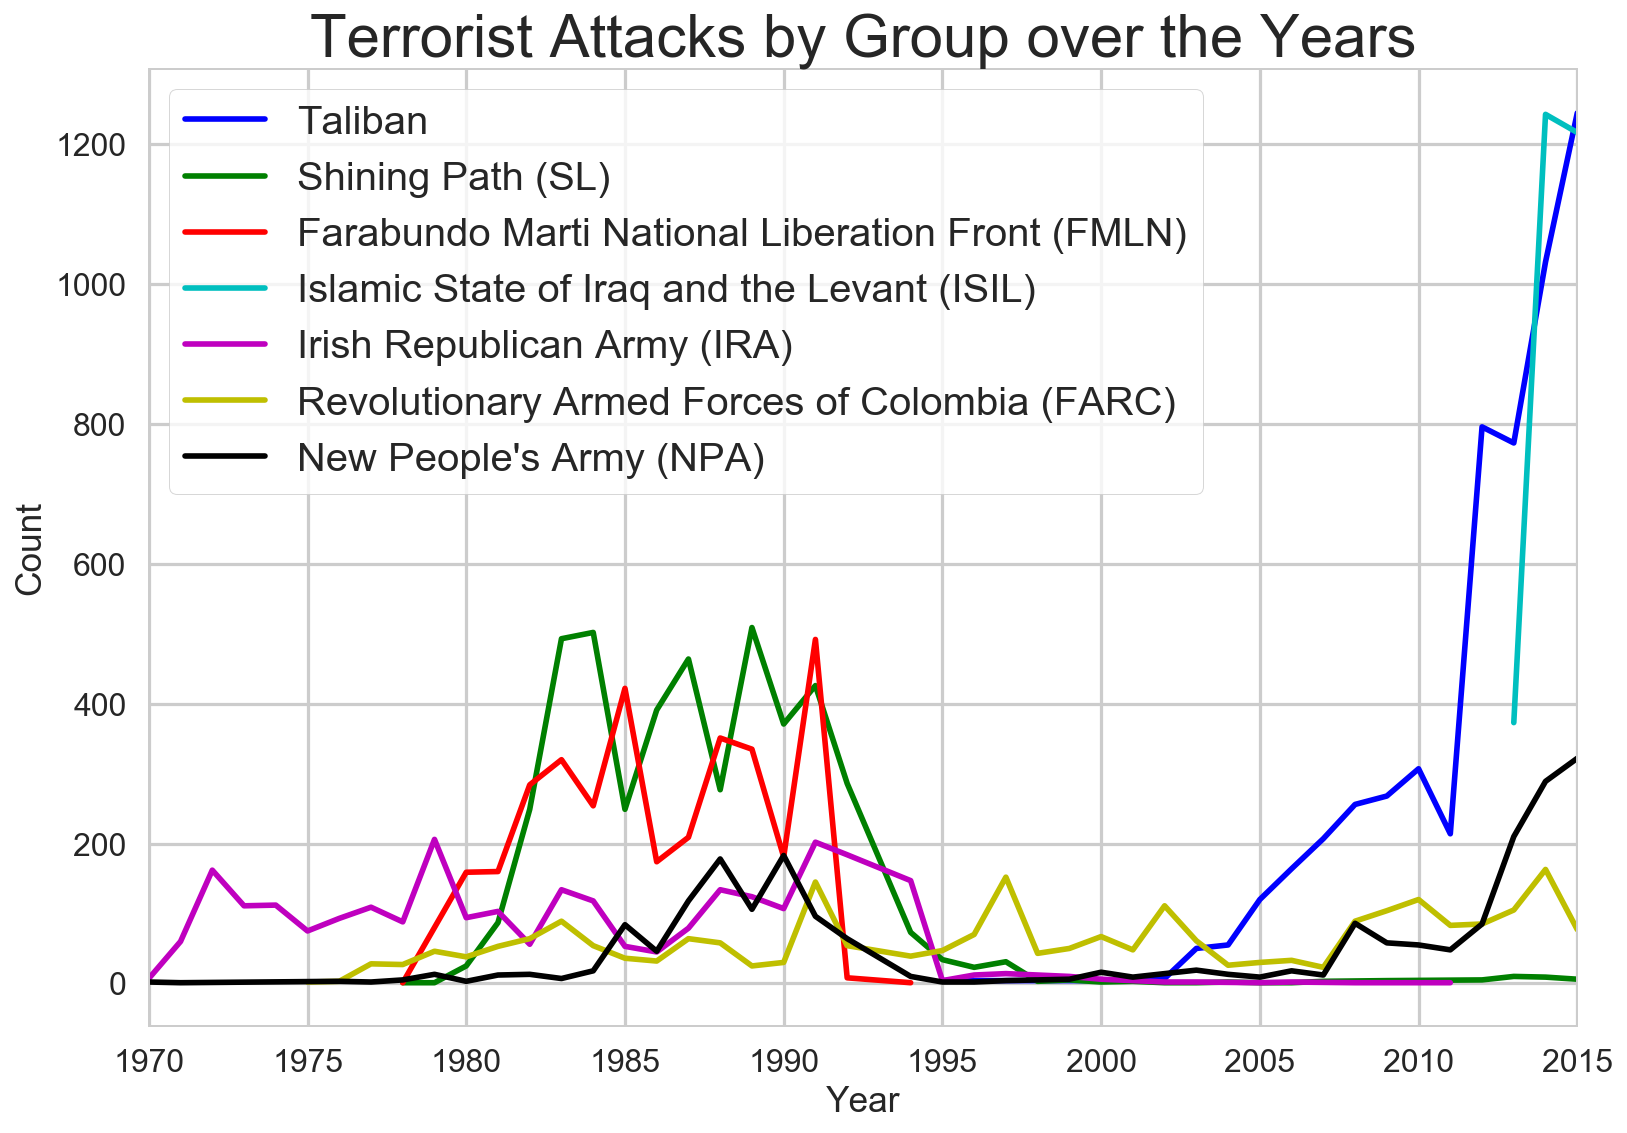

In [36]:
# attacks by group
labels = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, j in enumerate(gt.groupby('gname').eventid.count().sort_values(ascending=False).index[1:8]):
    gt[gt.gname == j].groupby('iyear')['gname'].count().plot(c=colors[i])
    labels.append(j)
plt.legend(loc=2, fontsize=20, frameon=True, fancybox=True, labels=labels)
plt.title('Terrorist Attacks by Group over the Years', fontsize=30)
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('../images/attacks-by-group-line.png')

In [37]:
print gt[(gt.iyear > 2010) & ((gt.gname.str.contains('ISIL')) | (gt.gname.str.contains('Taliban')))].nkill.sum()
print gt[(gt.iyear > 2013) & ((gt.gname.str.contains('ISIL')) | (gt.gname.str.contains('Taliban')))].nkill.sum() / gt[(gt.iyear > 2013)].nkill.sum()

38221.33
0.344642072903


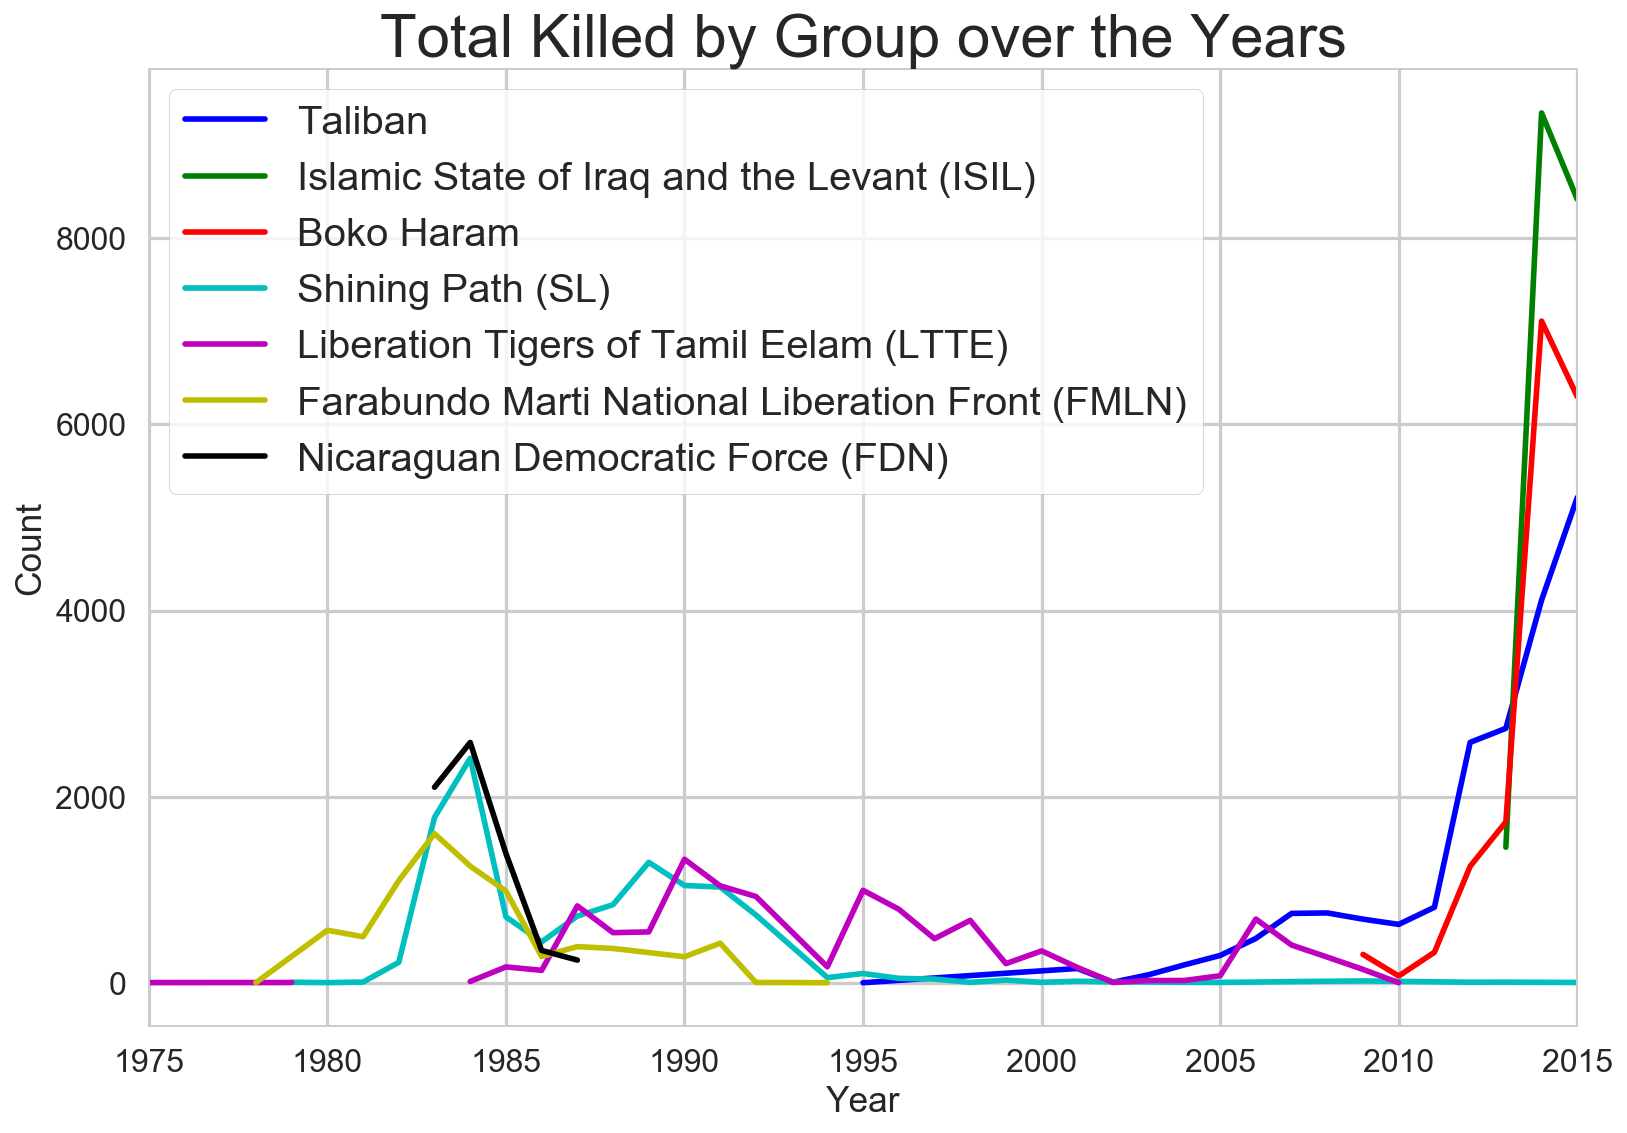

In [38]:
# attacks by group
labels = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, j in enumerate(gt.groupby('gname').nkill.sum().sort_values(ascending=False).index[1:8]):
    gt[gt.gname == j].groupby('iyear')['nkill'].sum().plot(c=colors[i])
    labels.append(j)
plt.legend(loc=2, fontsize=20, frameon=True, fancybox=True, labels=labels)
plt.title('Total Killed by Group over the Years', fontsize=30)
plt.xlabel('Year')
plt.ylabel('Count')
# plt.savefig('../images/attacks-by-group-line.png')

In [39]:
# most attacks by group for each attacktype
print 'ATTACKS:'
print '--------------------------------------------------------'
for i in gt[gt.attacktype1_txt != 'Unknown'].attacktype1_txt.unique():
    print i
    print gt[(gt.attacktype1_txt == i) & (gt.gname != 'Unknown') & (gt.attacktype1_txt != 'Unknown')
            ].groupby('gname').eventid.count().sort_values(ascending=False)[0:5]
    print

print 'NUMBER KILLED:'
print '--------------------------------------------------------'
for i in gt[gt.attacktype1_txt != 'Unknown'].attacktype1_txt.unique():
    print i
    print gt[(gt.attacktype1_txt == i) & (gt.gname != 'Unknown') & (gt.attacktype1_txt != 'Unknown')
            ].groupby('gname').nkill.sum().sort_values(ascending=False)[0:5]
    print

ATTACKS:
--------------------------------------------------------
Assassination
gname
Irish Republican Army (IRA)            858
Shining Path (SL)                      834
Basque Fatherland and Freedom (ETA)    471
Taliban                                385
New People's Army (NPA)                363
Name: eventid, dtype: int64

Hostage Taking (Kidnapping)
gname
Taliban                                           529
Islamic State of Iraq and the Levant (ISIL)       340
Revolutionary Armed Forces of Colombia (FARC)     324
National Liberation Army of Colombia (ELN)        310
Communist Party of India - Maoist (CPI-Maoist)    257
Name: eventid, dtype: int64

Bombing/Explosion
gname
Taliban                                             2323
Shining Path (SL)                                   2160
Islamic State of Iraq and the Levant (ISIL)         1858
Farabundo Marti National Liberation Front (FMLN)    1408
Basque Fatherland and Freedom (ETA)                 1205
Name: eventid, dtype: int64


## Number Killed by Group

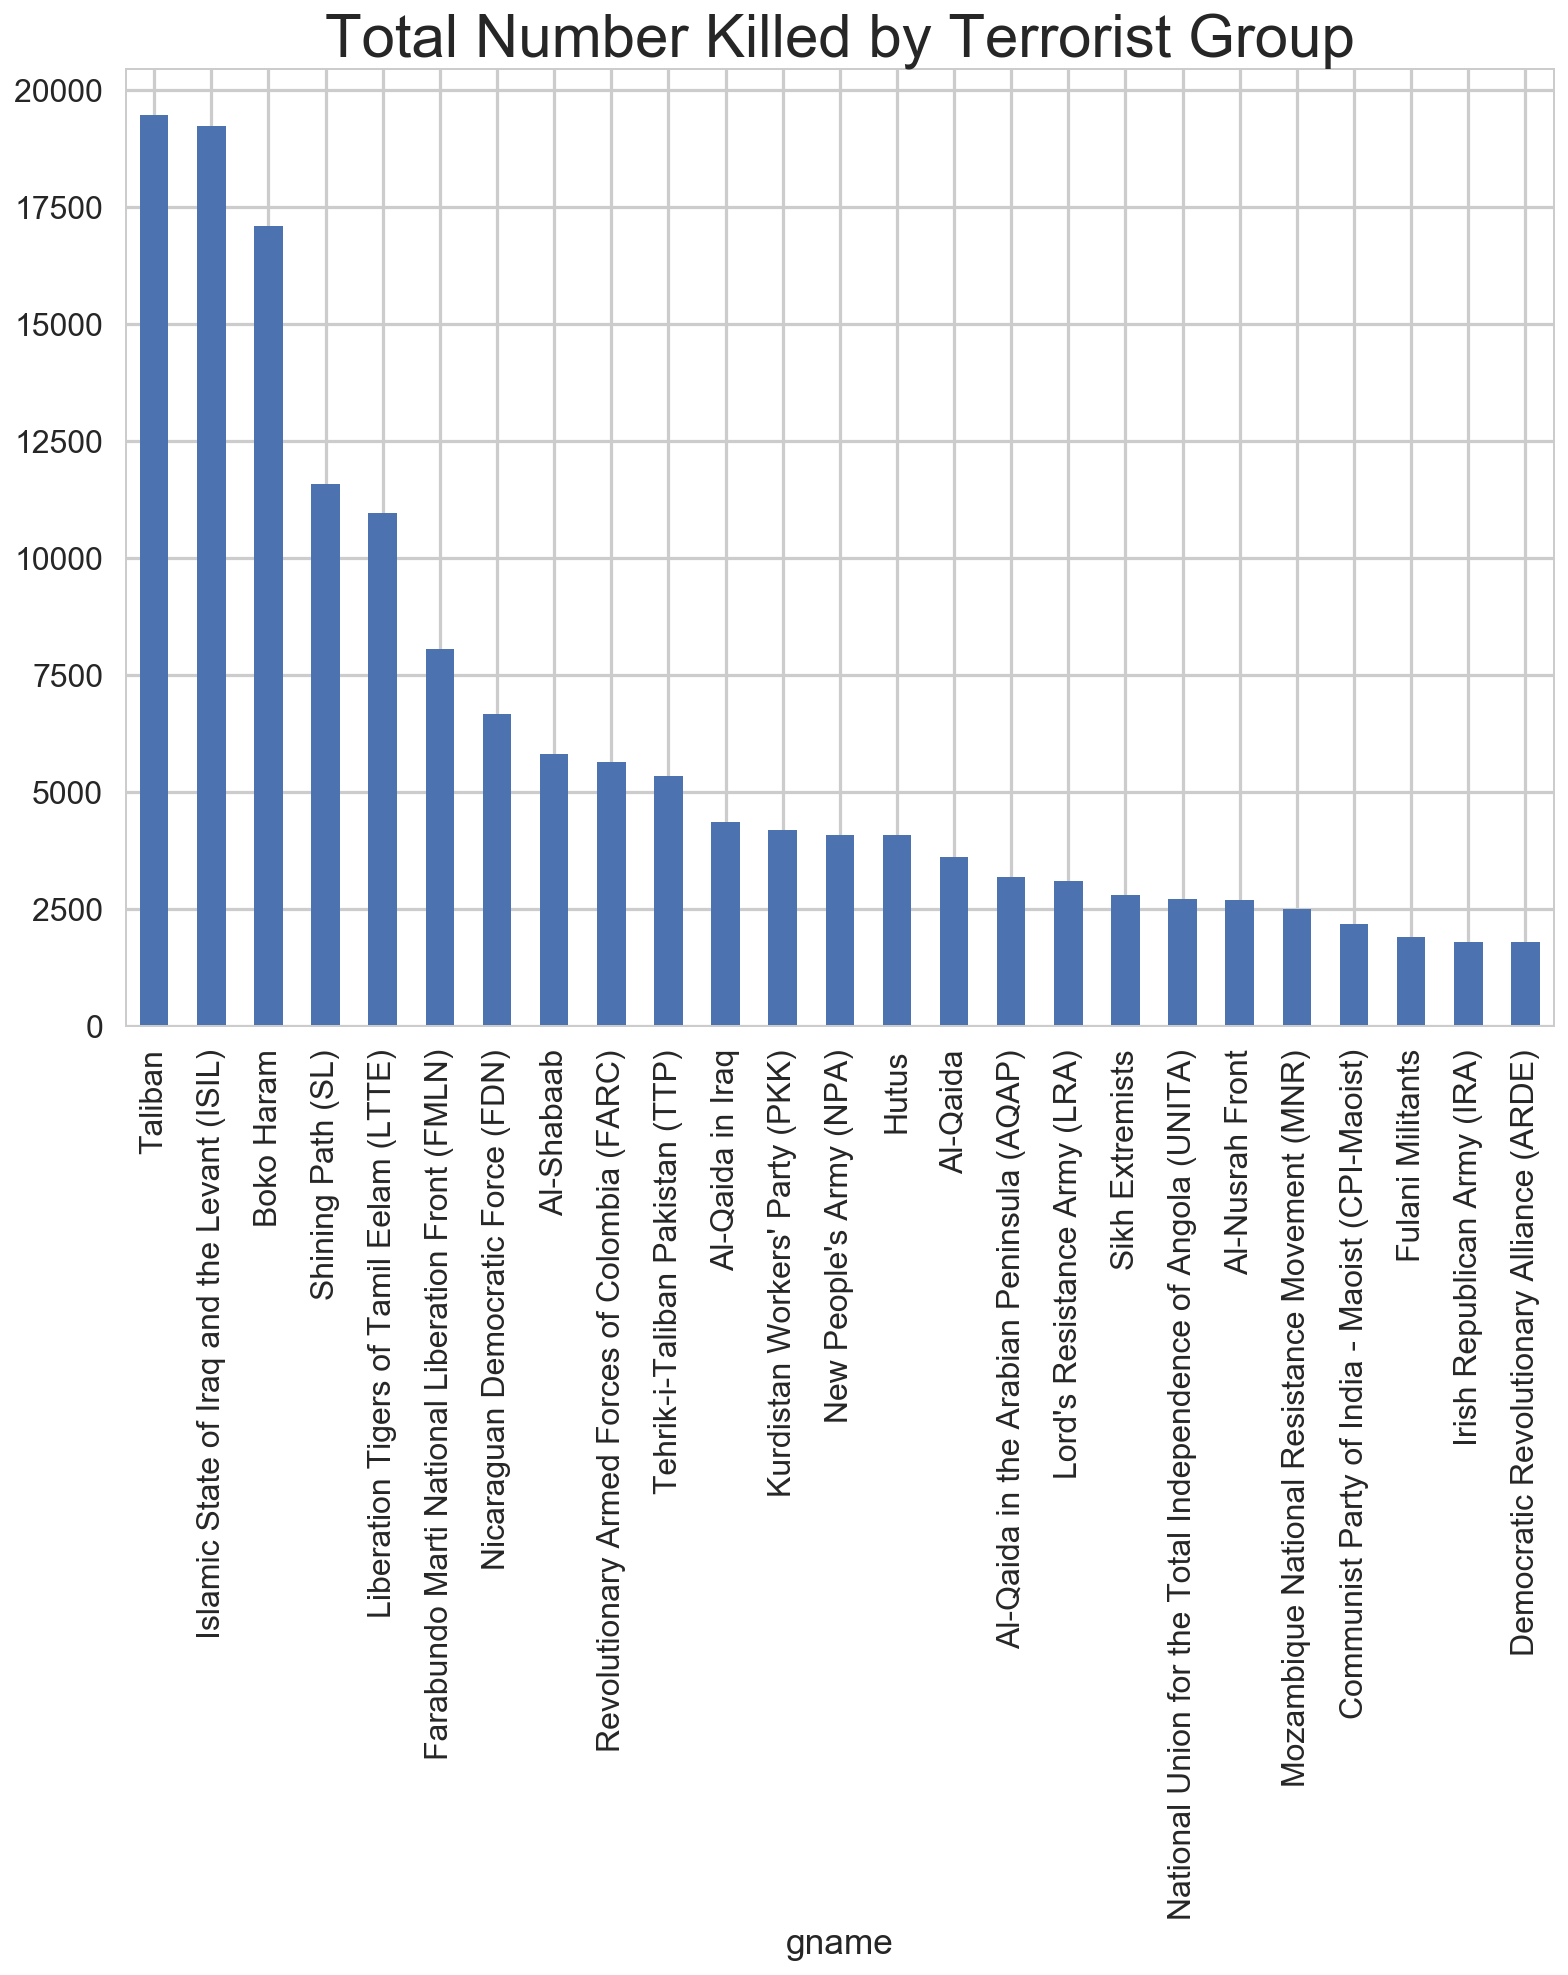

In [40]:
# total killed by group
gt[(gt.nkill.notnull()) & (gt.gname != 'Unknown')].groupby('gname').nkill.sum().sort_values(ascending=False)[0:25].plot(kind='bar')
plt.title('Total Number Killed by Terrorist Group', fontsize=30)

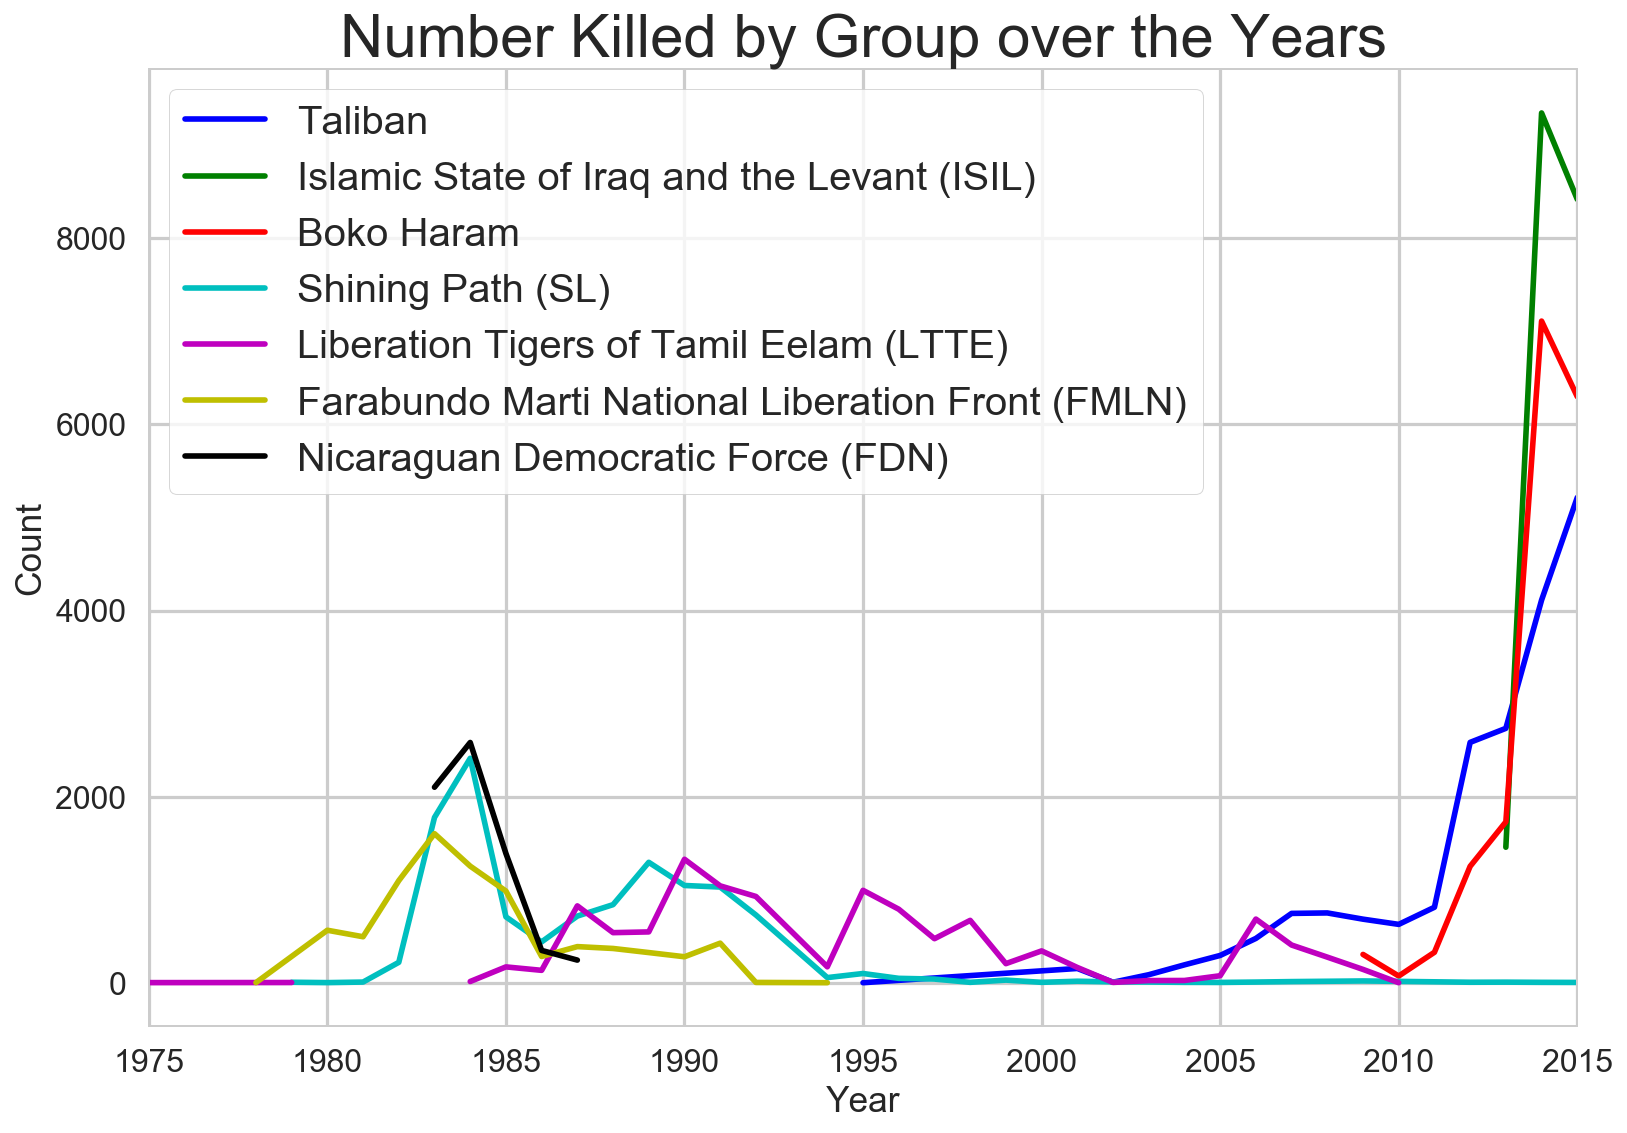

In [41]:
# number killed by group
labels = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, j in enumerate(gt.groupby('gname').nkill.sum().sort_values(ascending=False).index[1:8]):
    gt[gt.gname == j].groupby('iyear')['nkill'].sum().plot(c=colors[i])
    labels.append(j)
plt.legend(loc=2, fontsize=20, frameon=True, fancybox=True, labels=labels)
plt.title('Number Killed by Group over the Years', fontsize=30)
plt.xlabel('Year')
plt.ylabel('Count')
# plt.savefig('../images/attacks-by-group-line.png')

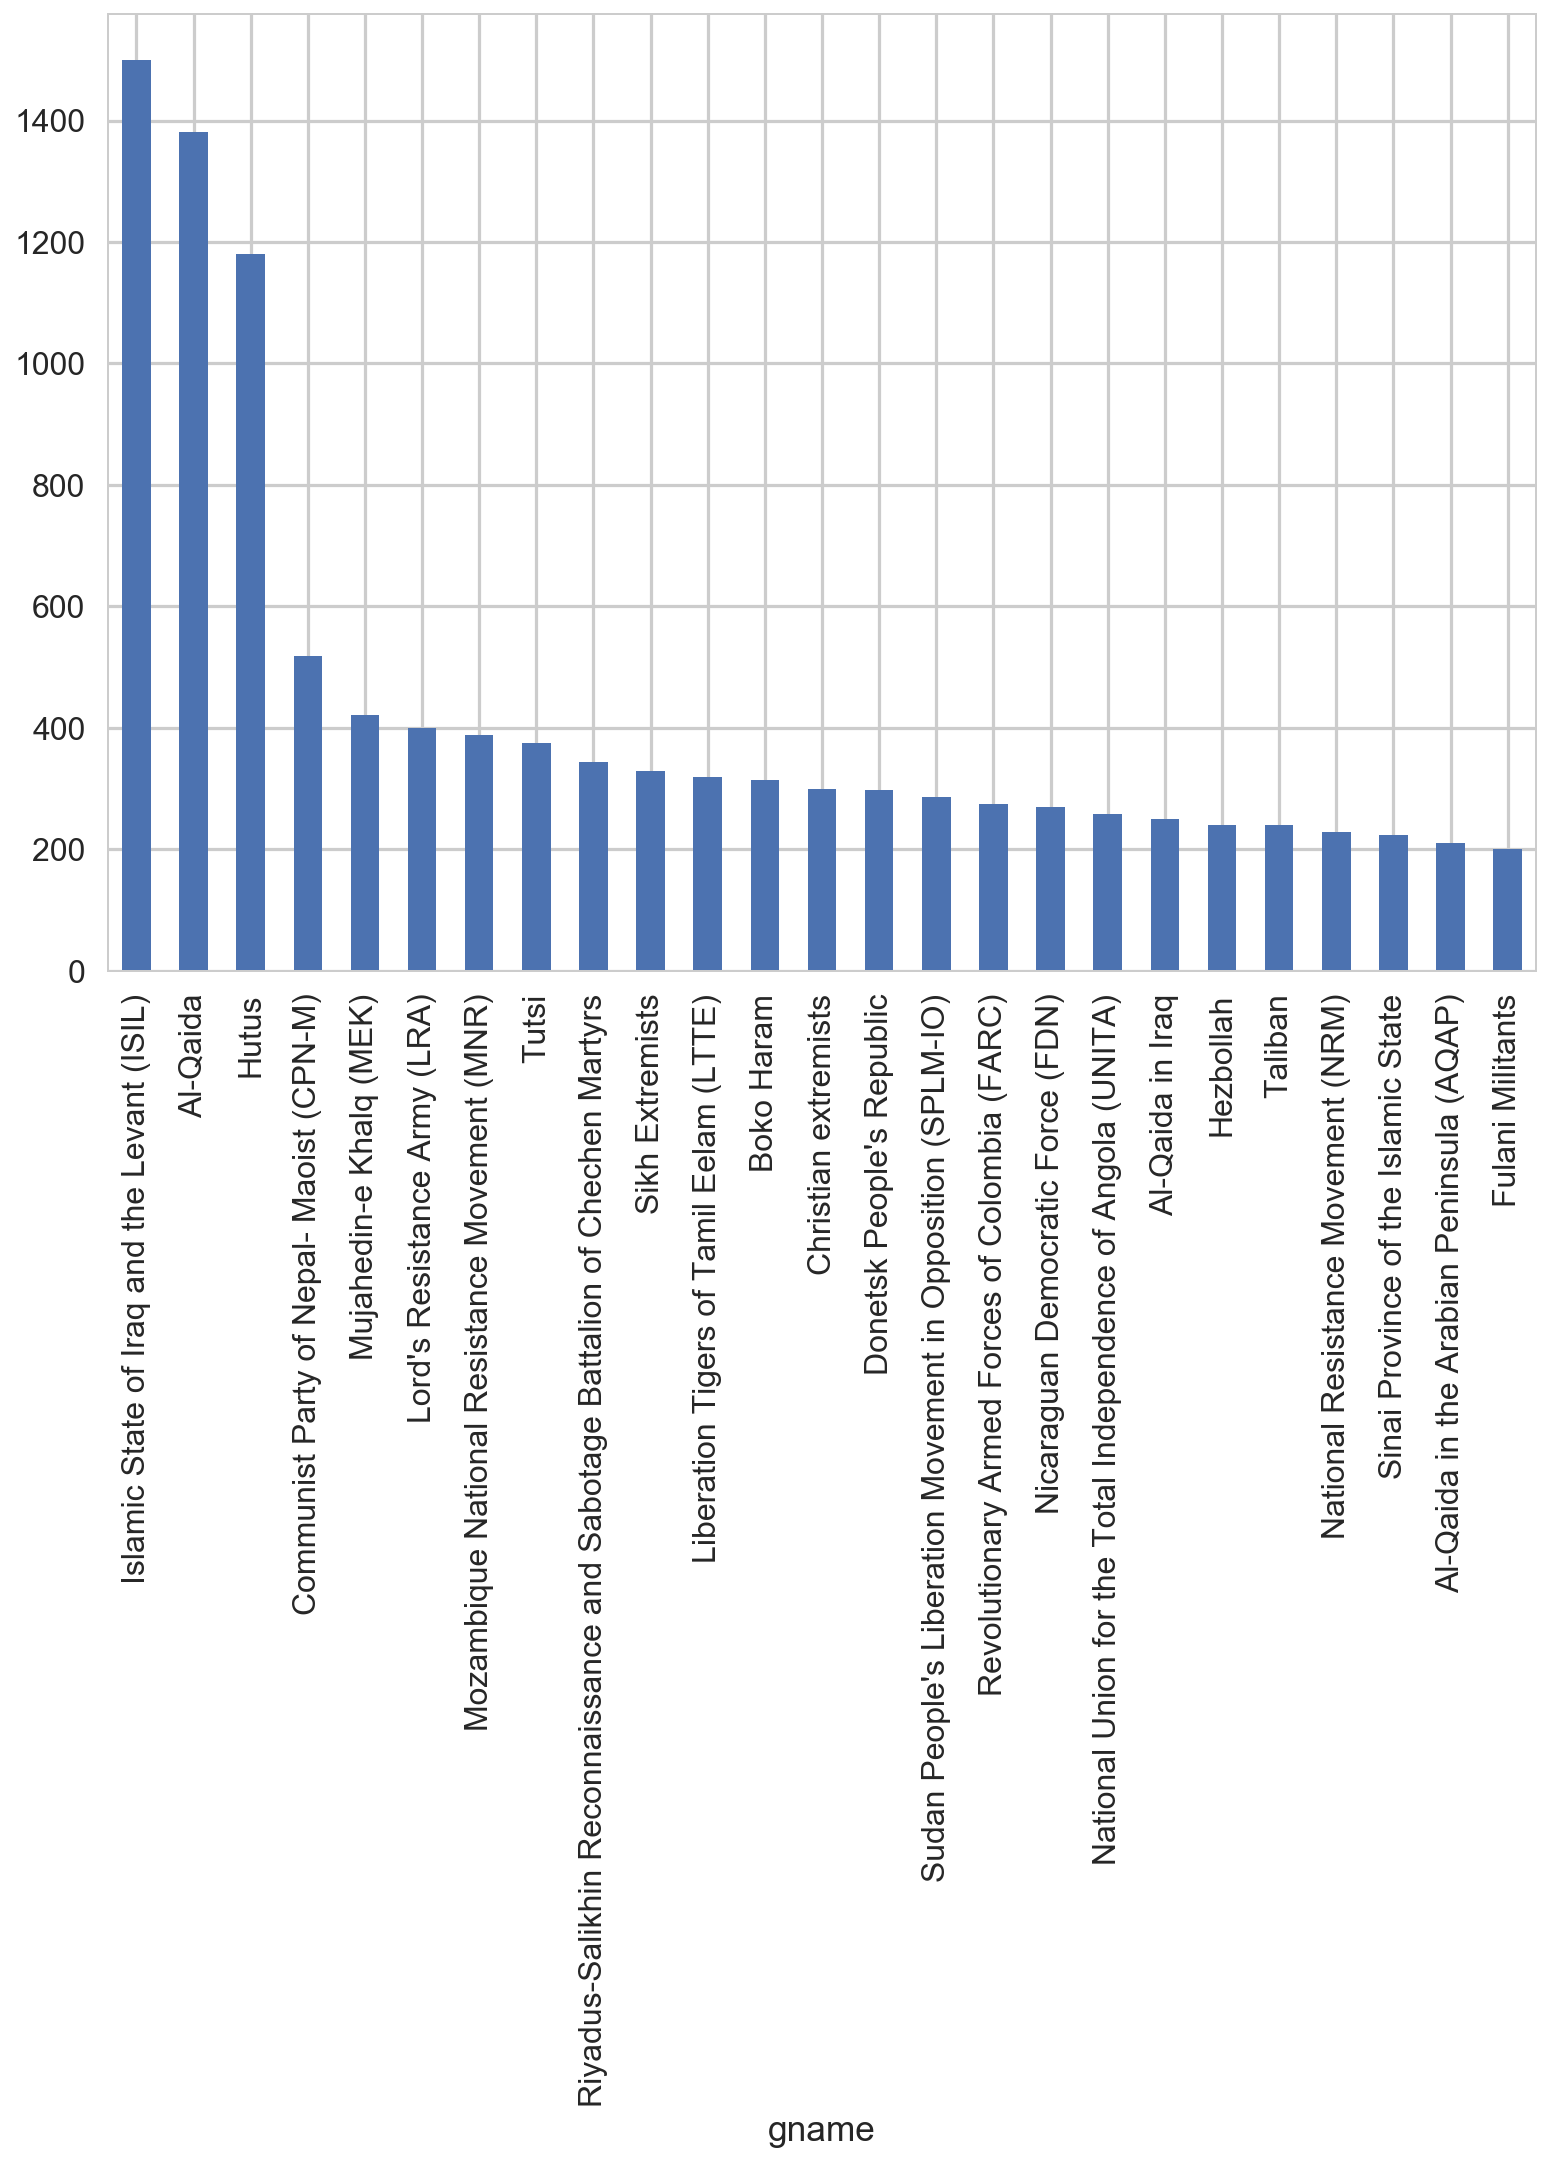

In [42]:
# largest attack by group
gt[gt.gname != 'Unknown'].groupby('gname').nkill.max().sort_values(ascending=False)[0:25].plot(kind='bar')

In [43]:
for i in gt[gt.gname != 'Unknown'].groupby('gname').nkill.max().sort_values(ascending=False)[0:3].index:
    print gt[(gt.gname == i)].sort_values('nkill', ascending=False).iloc[0]
    print
    print

eventid                                                    201406150063
iyear                                                              2014
imonth                                                                6
iday                                                                 12
approxdate                                                          NaN
extended                                                              1
resolution                                                          NaN
country                                                              95
country_txt                                                        Iraq
region                                                               10
region_txt                                   Middle East & North Africa
provstate                                                       Saladin
city                                                             Tikrit
latitude                                                        

# Bayesian

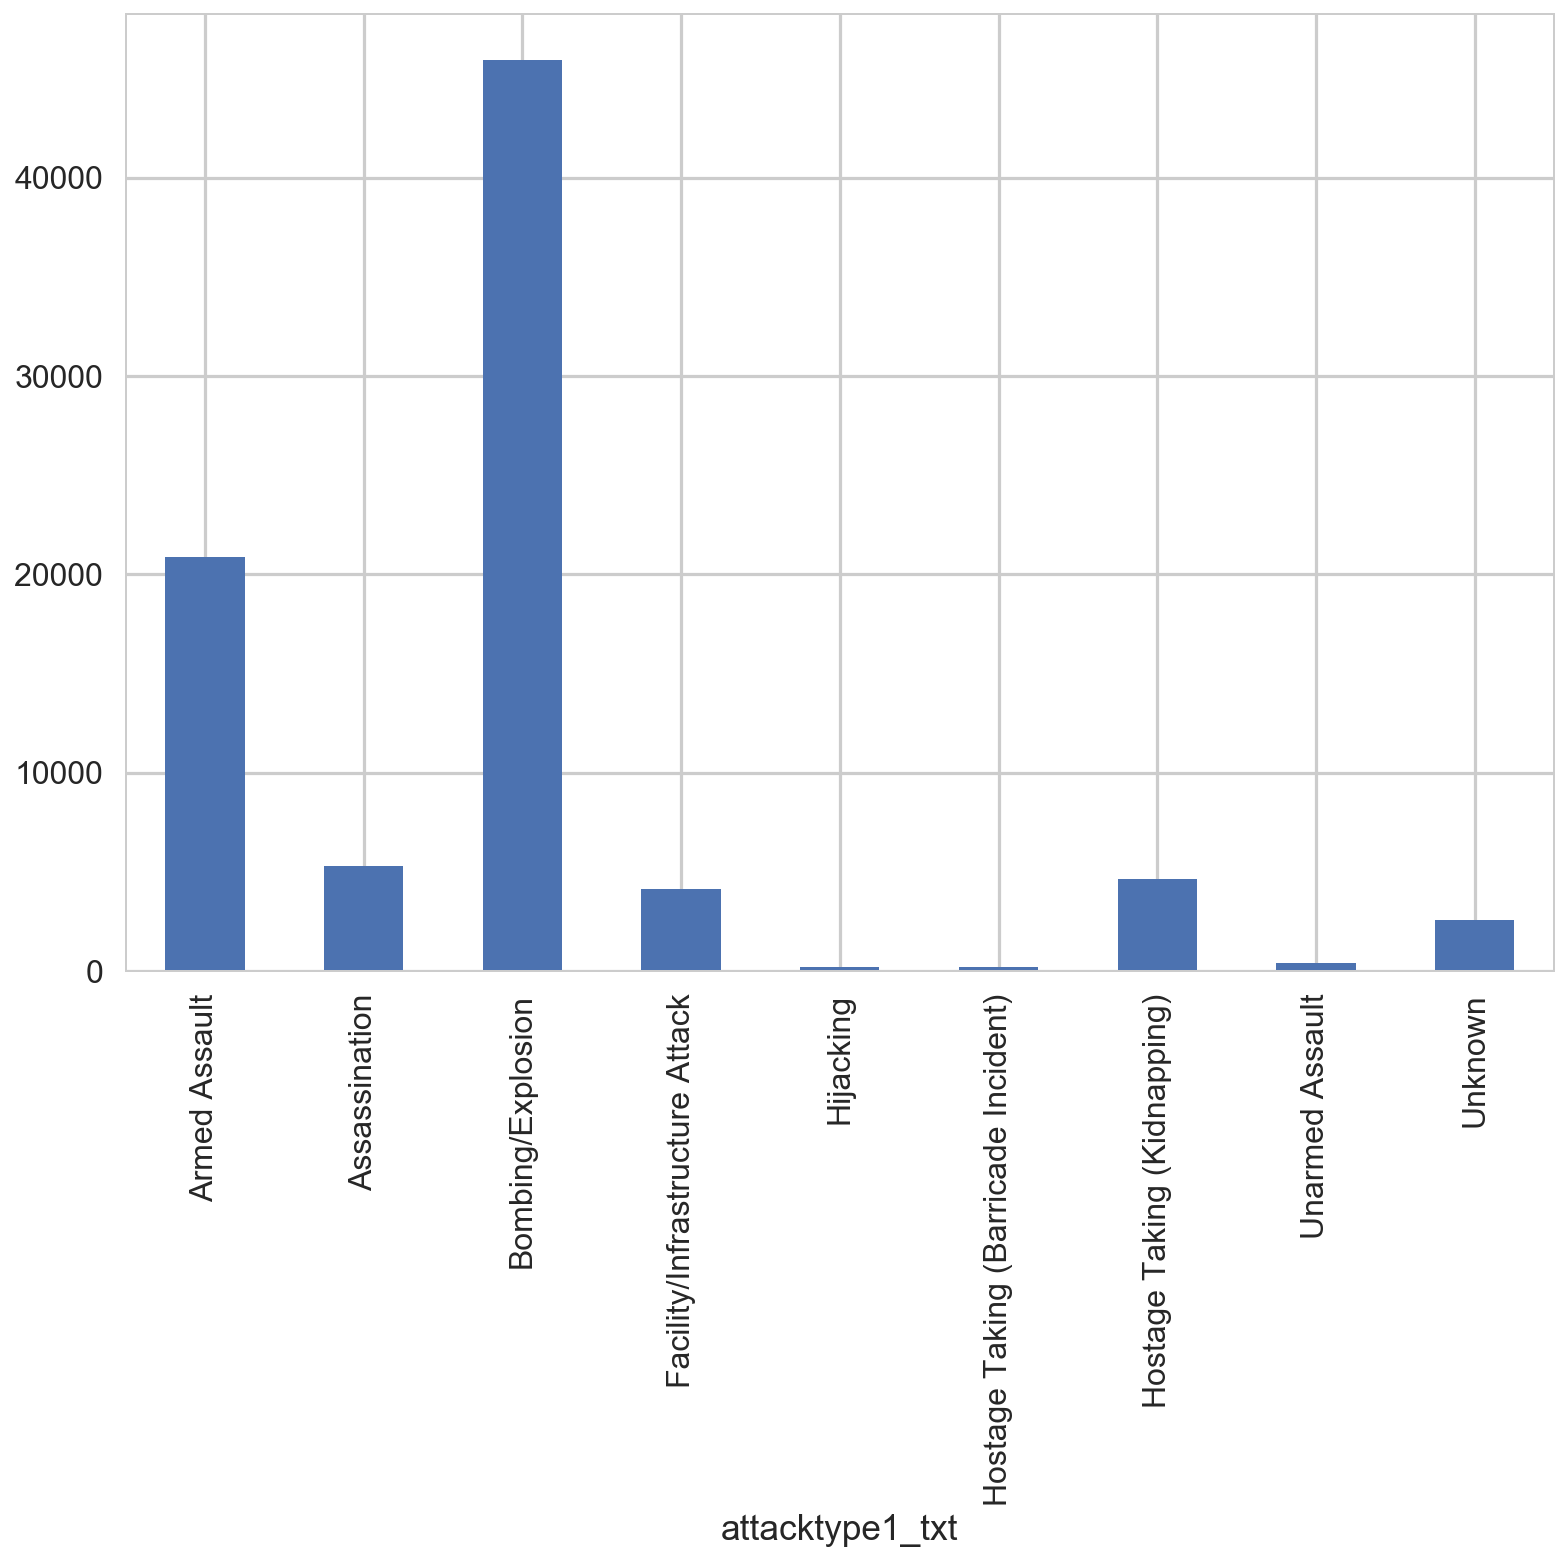

In [44]:
gt[gt.iyear >= 2000].groupby('attacktype1_txt').nkill.count().plot(kind='bar')

In [45]:
import pymc3 as pm
import pydot

Couldn't import dot_parser, loading of dot files will not be possible.


In [46]:
sasia_aa = pd.DataFrame(gt[(gt.attacktype1_txt == 'Armed Assault') & (gt.region_txt == 'South Asia')]
                        .groupby(['iyear', 'country_txt']).nkill.sum()).reset_index()

In [47]:
sasia_aa_y = sasia_aa[sasia_aa.iyear >= 2000]

In [48]:
sasia_aa_y.groupby('country_txt').nkill.sum()

country_txt
Afghanistan    8745.33
Bangladesh       71.00
India          4400.00
Maldives          0.00
Nepal          1259.00
Pakistan       5815.25
Sri Lanka       708.00
Name: nkill, dtype: float64

##### Lets compare the number of Armed Assault fatalities in Pakistan and Afghanistan in the 21st century

In [49]:
sasia_aa_prior = sasia_aa[sasia_aa.iyear < 2000]

In [50]:
afg = sasia_aa_y[sasia_aa_y.country_txt == 'Afghanistan'].groupby('iyear').nkill.sum().values
pak = sasia_aa_y[sasia_aa_y.country_txt == 'Pakistan'].groupby('iyear').nkill.sum().values

In [51]:
prior_mean = sasia_aa_prior.groupby('iyear').nkill.sum().mean()
prior_std = sasia_aa_prior.groupby('iyear').nkill.sum().std()

In [52]:
print prior_mean
print prior_std

614.375
587.37970493


In [53]:
with pm.Model() as model:

    afg_mean = pm.Normal('attacks_afg_mean', prior_mean, sd=prior_std)
    pak_mean = pm.Normal('attacks_pak_mean', prior_mean, sd=prior_std)

In [54]:
std_prior_lower = 1.0
std_prior_upper = 1500.0

with model:
    
    afg_std = pm.Uniform('attacks_afg_std', lower=std_prior_lower, upper=std_prior_upper)
    pak_std = pm.Uniform('attacks_pak_std', lower=std_prior_lower, upper=std_prior_upper)

In [55]:
with model:

    grp_afg = pm.Normal('group_afg', mu=afg_mean, sd=afg_std, observed=afg)
    grp_pak = pm.Normal('group_pak', mu=pak_mean, sd=pak_std, observed=pak)

In [56]:
with model:

    diff_of_means = pm.Deterministic('difference of means', afg_mean - pak_mean)
    diff_of_stds = pm.Deterministic('difference of stds', afg_std - pak_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((afg_std**2 + pak_std**2) / 2))

In [57]:
with model:
    trace = pm.sample(20000, njobs=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -255.94: 100%|██████████| 200000/200000 [00:17<00:00, 11757.15it/s]
Finished [100%]: Average ELBO = -255.94
100%|██████████| 20000/20000 [00:21<00:00, 949.72it/s] 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1281eda10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1283caf50>], dtype=object)

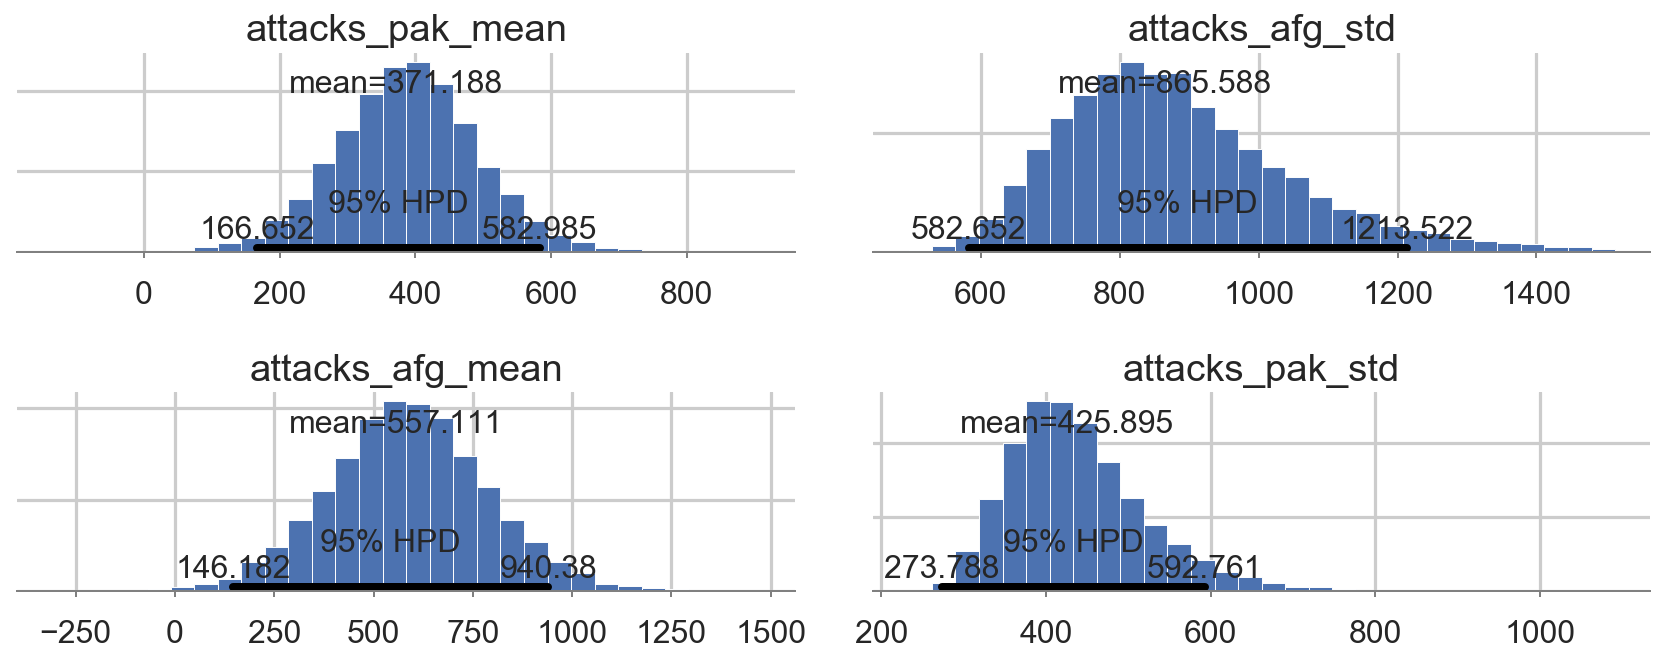

In [58]:
pm.plot_posterior(trace[3000:],
                  varnames=['attacks_afg_mean', 'attacks_pak_mean', 'attacks_afg_std', 'attacks_pak_std'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1270e51d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11dbf8c50>], dtype=object)

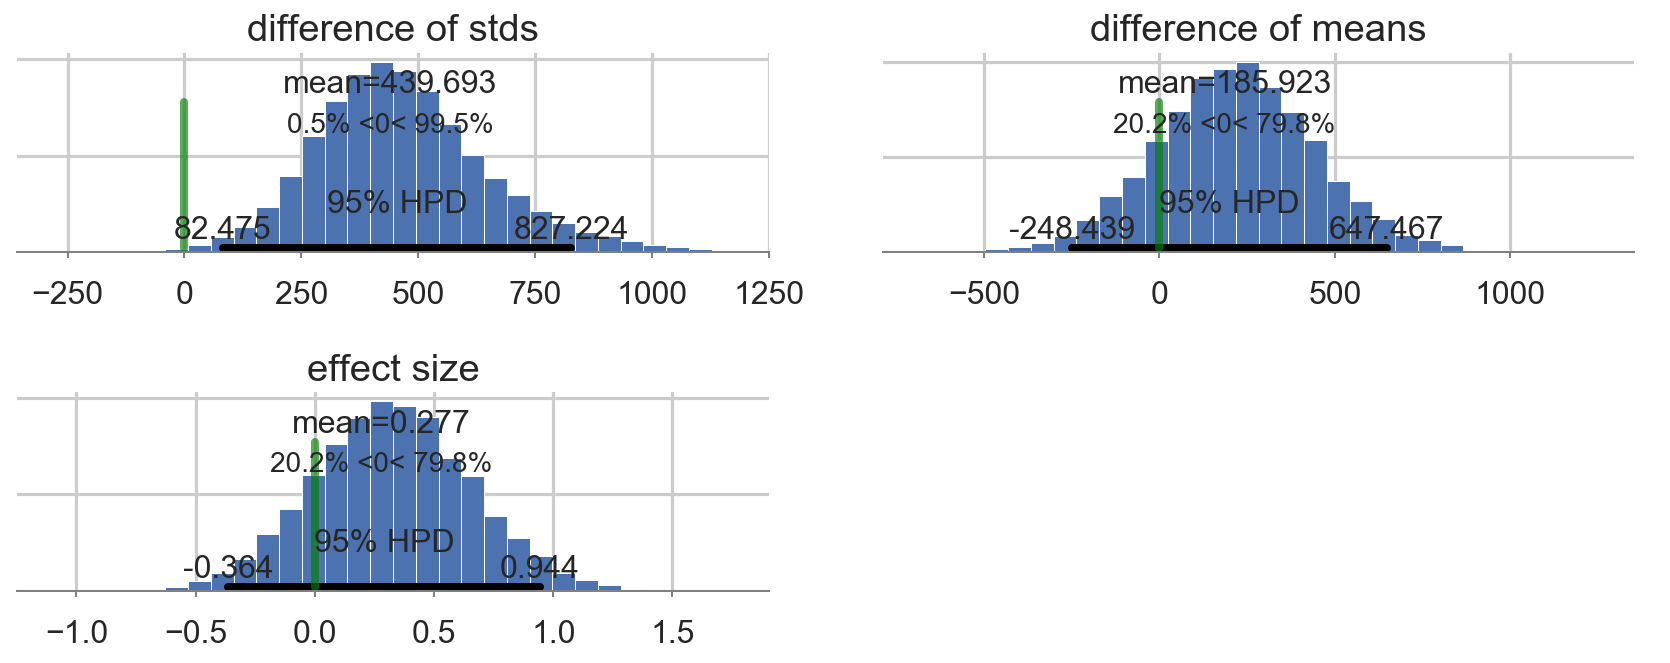

In [59]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'], ref_val=0)

# 1993

The year 1993 is missing from the dataset. Below, I developed a strategy to best estimate the number of bombings that occured that year. I used an AR model with a order of p = 2

In [60]:
bomb = gt[gt.attacktype1_txt == 'Bombing/Explosion']

In [61]:
bomb_by_year = pd.DataFrame(bomb.groupby('iyear').eventid.count())
bomb_by_year.columns = ['count']
bomb_by_year.index = [str(i) + '-01-01' for i in bomb_by_year.index]
bomb_by_year.index = pd.to_datetime(bomb_by_year.index)

In [62]:
bomb_by_year['count'] = bomb_by_year['count'].astype(float)

In [63]:
bomb_by_year['count'].autocorr(lag=1)

0.94638117187701087

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


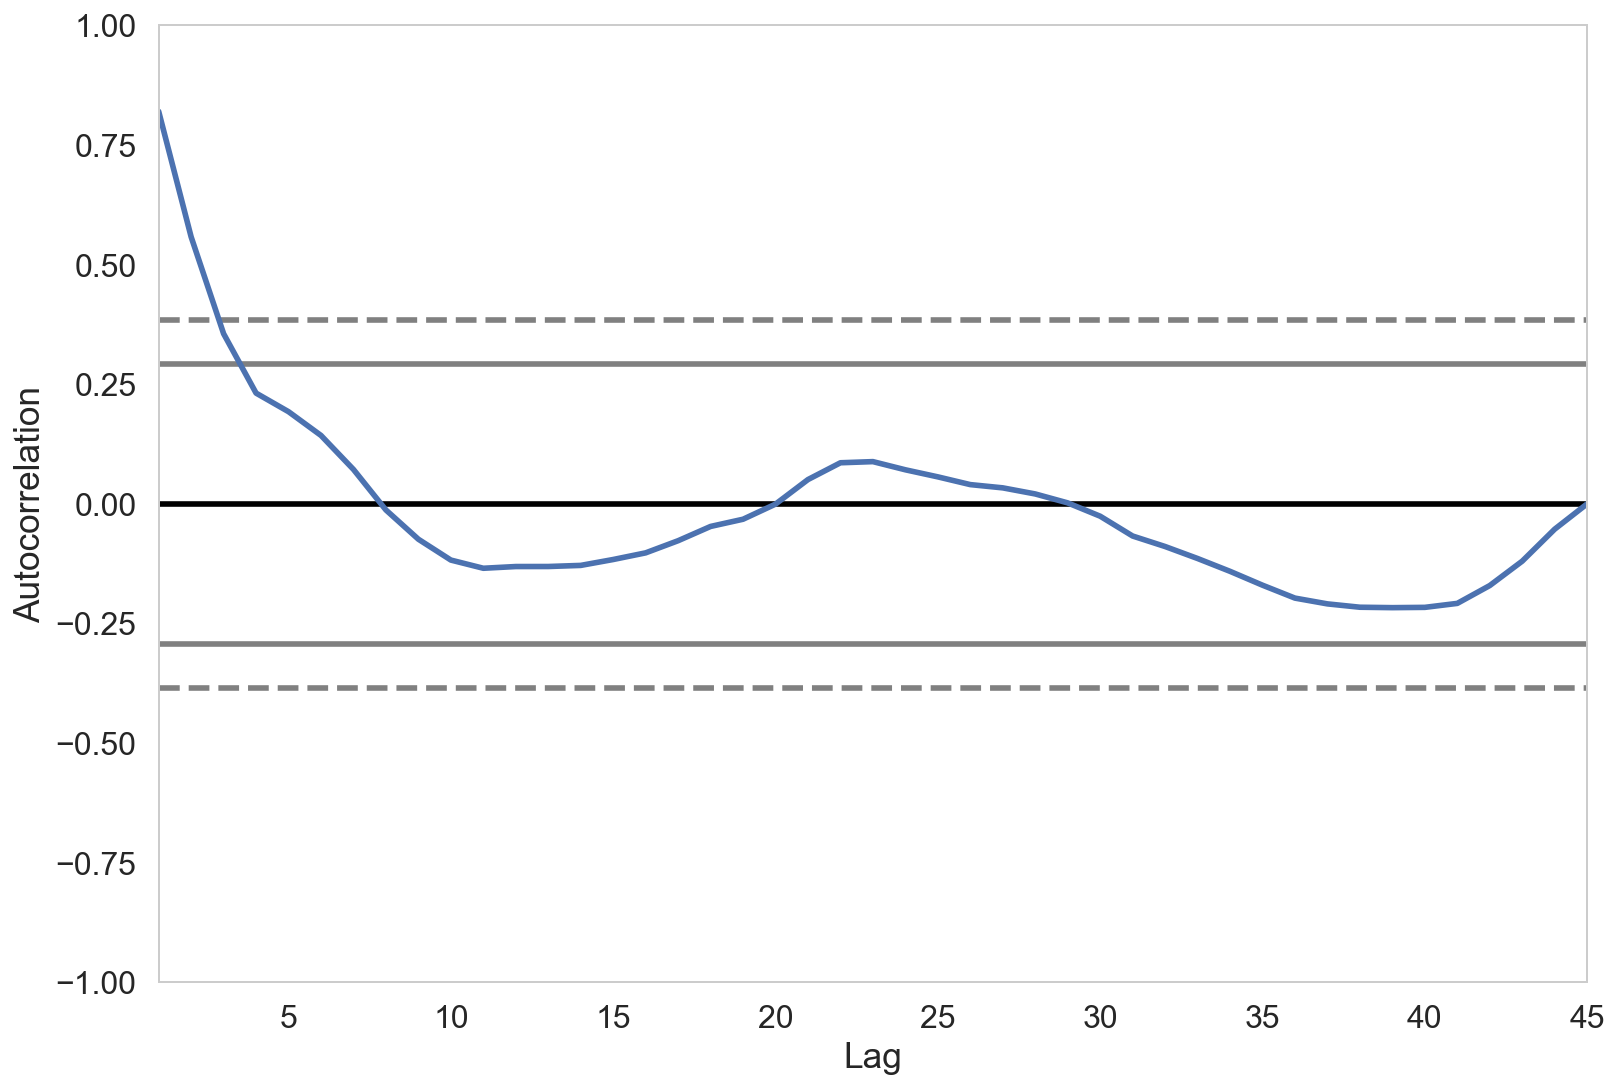

In [64]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(bomb_by_year['count'])

//anaconda/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


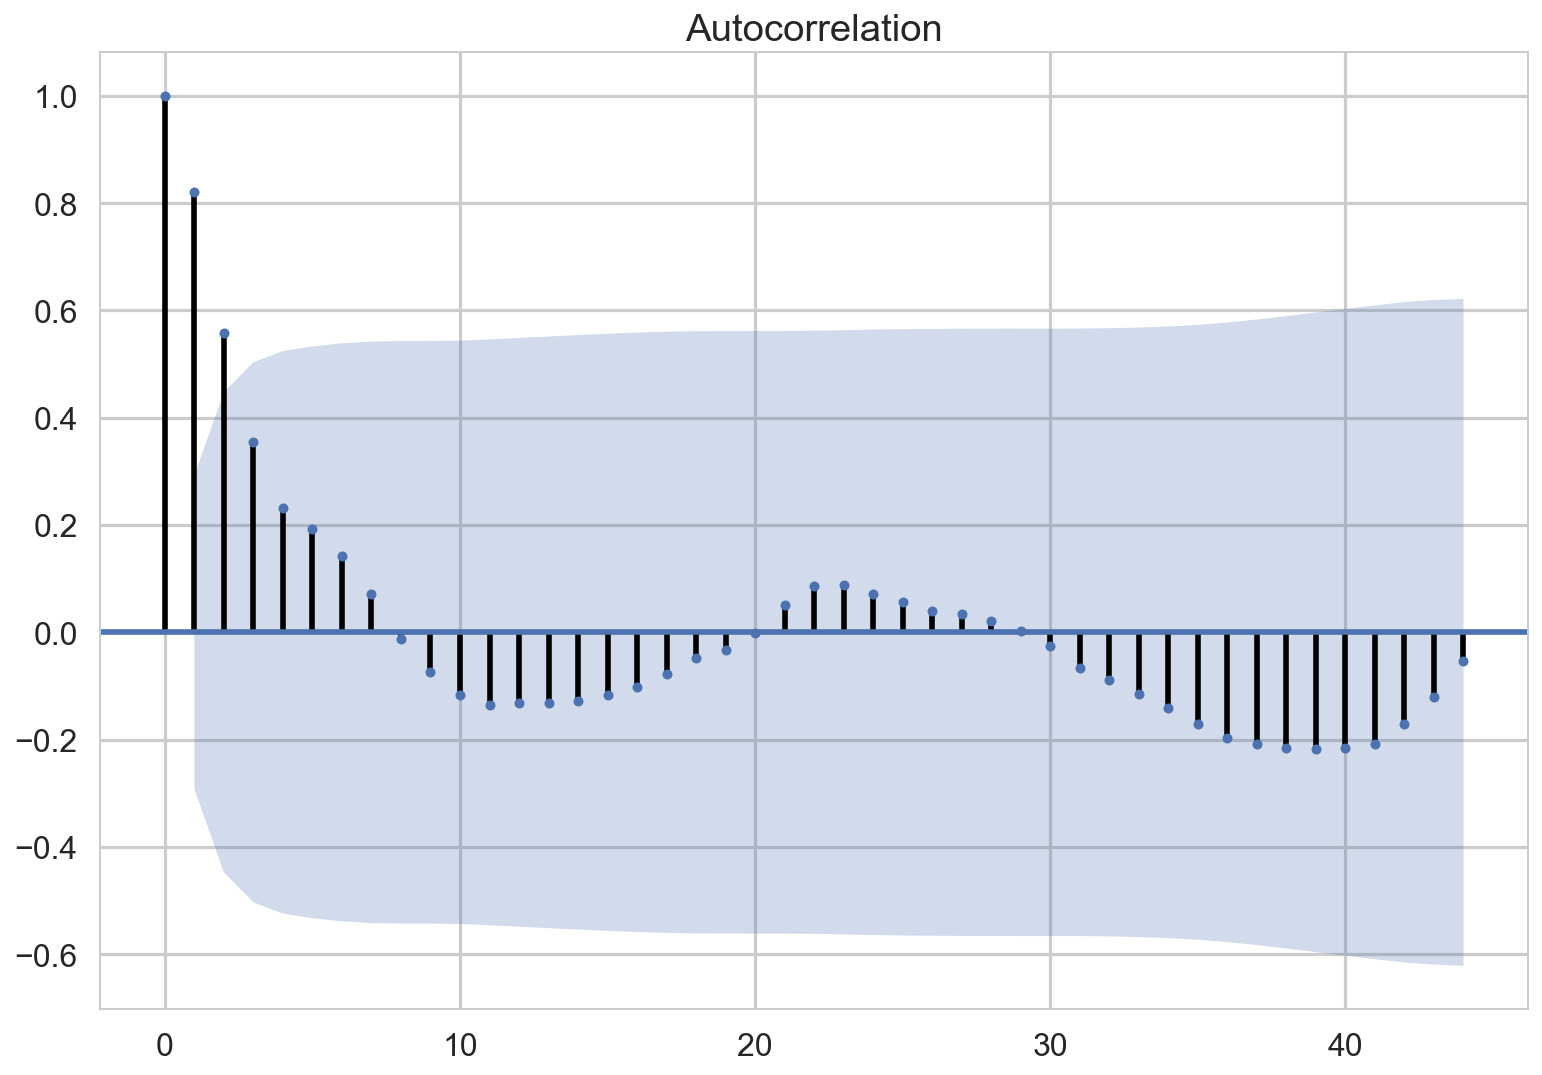

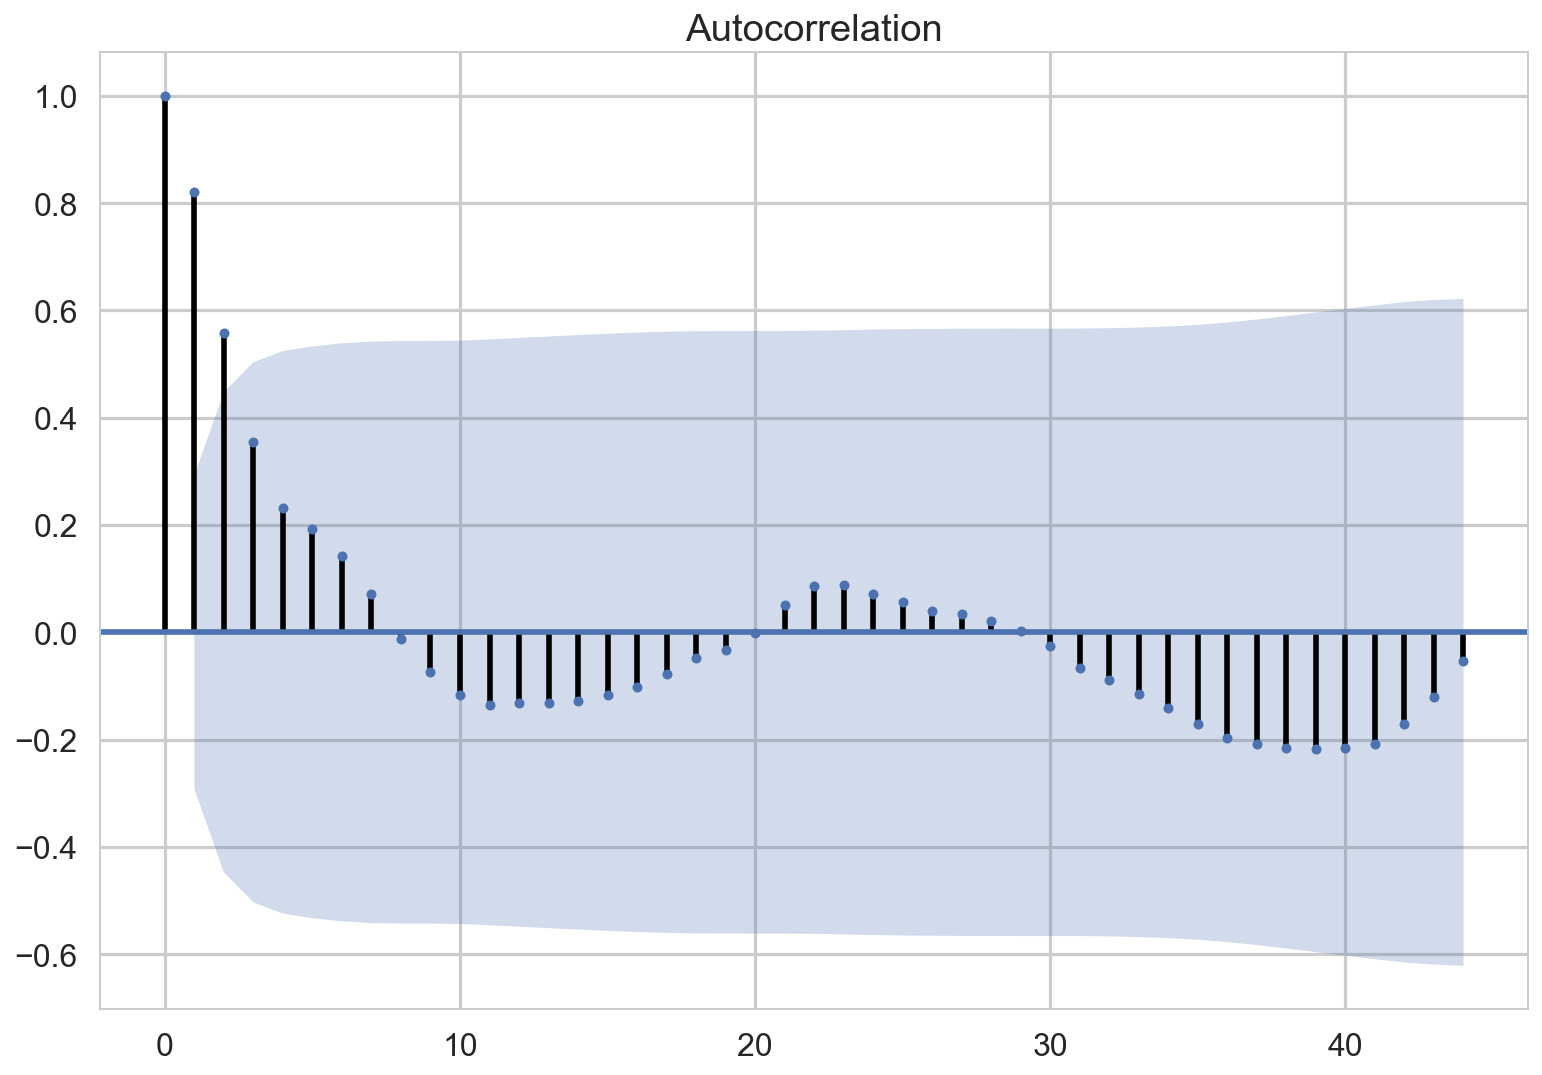

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(bomb_by_year['count'])

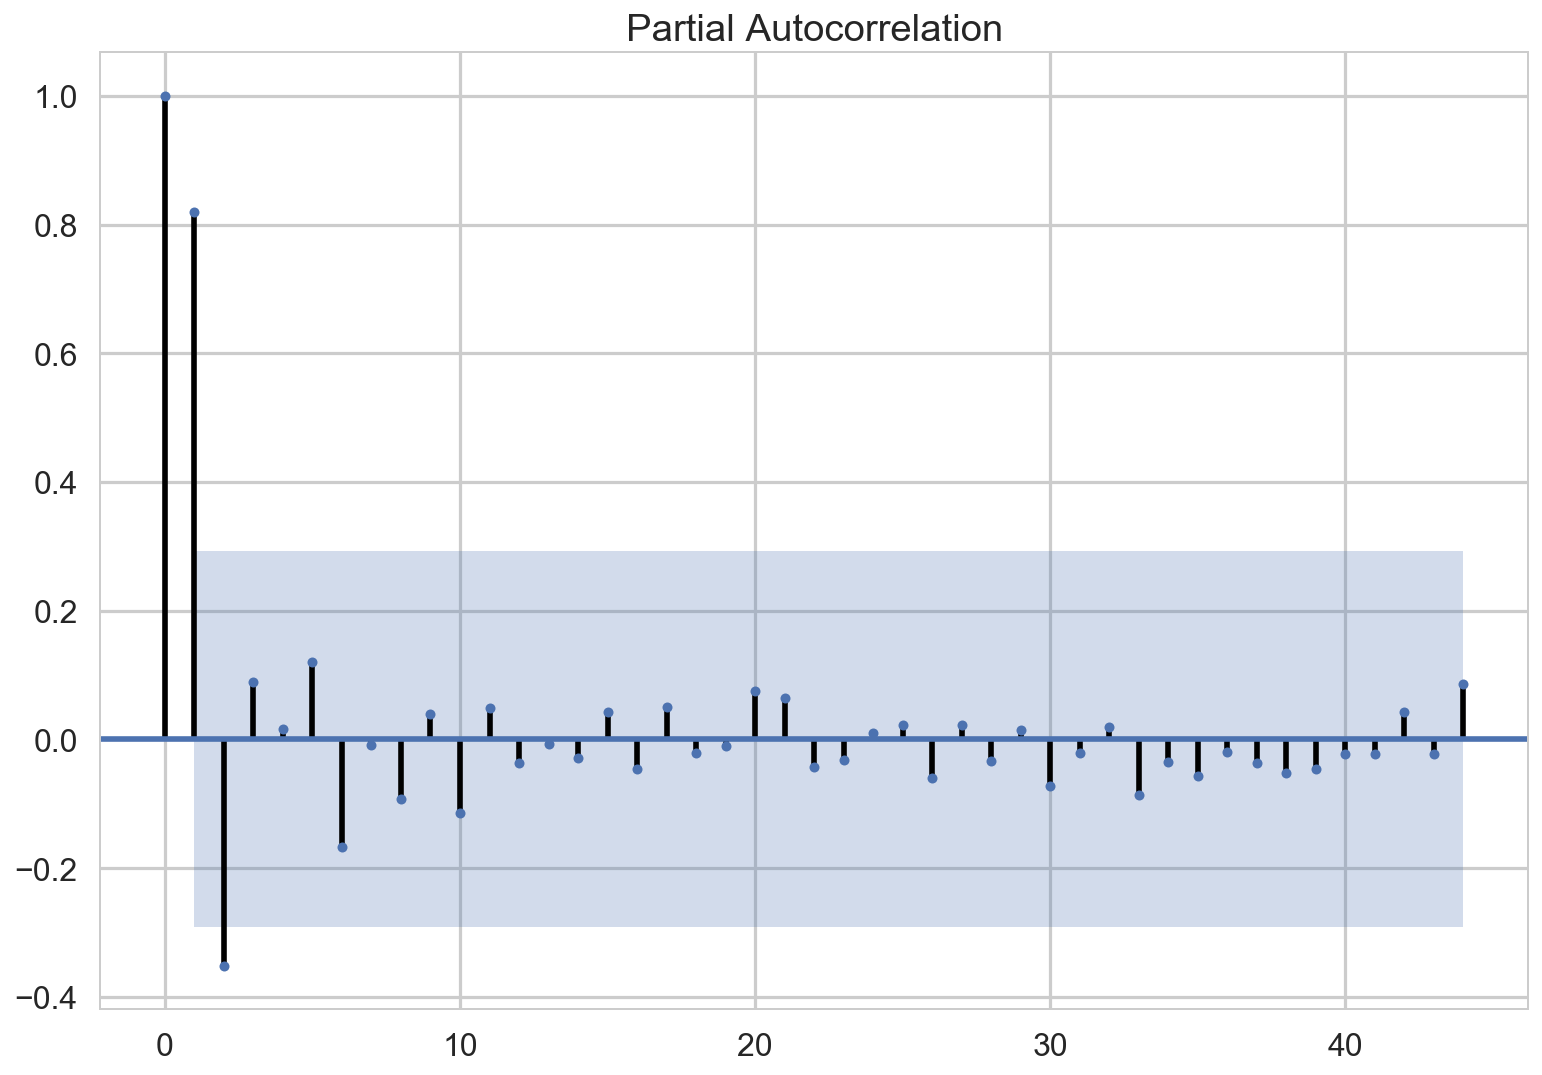

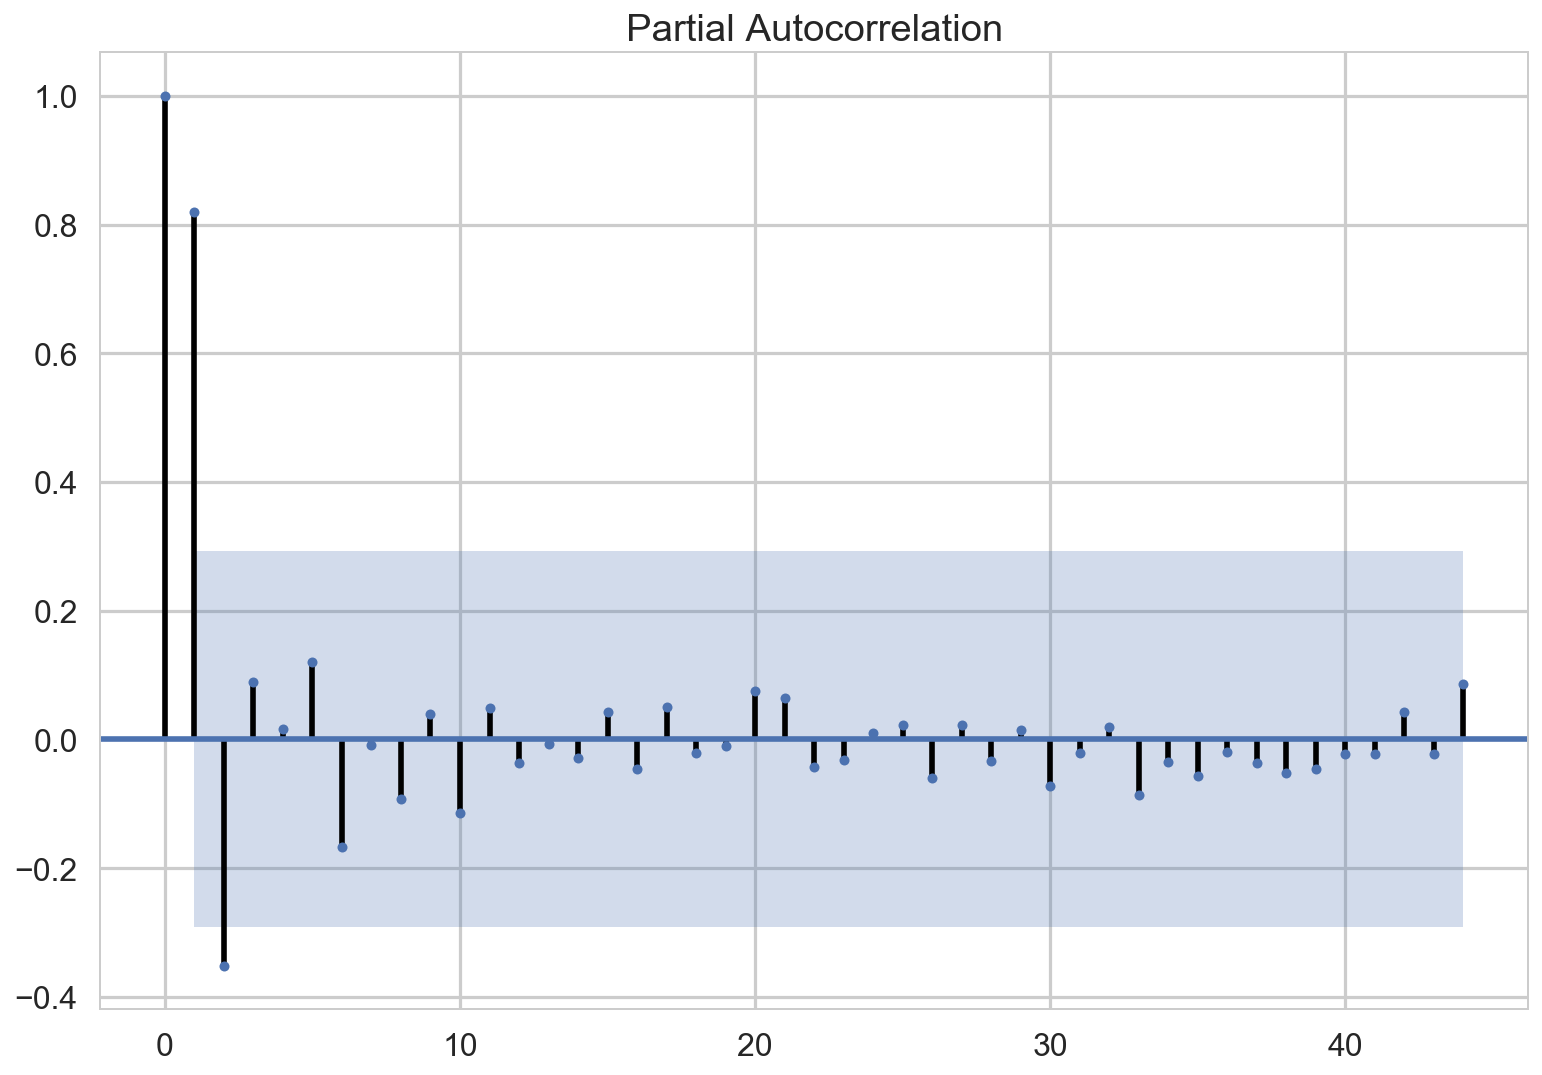

In [66]:
plot_pacf(bomb_by_year['count'])

In [67]:
from statsmodels.tsa.arima_model import ARMA

In [68]:
model = ARMA(bomb_by_year, (2,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                   45
Model:                     ARMA(2, 0)   Log Likelihood                -352.042
Method:                       css-mle   S.D. of innovations            585.770
Date:                Wed, 07 Jun 2017   AIC                            712.085
Time:                        13:26:12   BIC                            719.311
Sample:                    01-01-1970   HQIC                           714.779
                         - 01-01-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2088.0196   1187.708      1.758      0.086    -239.845    4415.884
ar.L1.count     1.3867      0.155      8.921      0.000       1.082       1.691
ar.L2.count    -0.4583      0.191     -2.401      0.021      -0.832      -0.084
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1863           +0.0000j            1.1863            0.0000
AR.2            1.8391           +0.0000j            1.8391            0.0000
-----------------------------------------------------------------------------
"""

In [69]:
predictions = bomb_by_year.merge(pd.DataFrame(results.predict()), left_index=True, right_index=True)
predictions.columns = ['actual_bombings', 'predicted_bombings']

In [70]:
bomb_pred_93 = predictions.loc['1994', 'predicted_bombings'][0]
bomb_pred_93

1648.4957329388039

##### Additional methods of estimating the number of bombings, such as taking a moving average.

In [71]:
test = bomb[(bomb.iyear >= 1991) & (bomb.iyear <= 1995)].groupby('iyear').eventid.count()

In [72]:
np.mean(test)

1417.5

In [73]:
for i in range(1990, 1997):
    print i
    print bomb[bomb.iyear == i].region_txt.value_counts()
    print gt[gt.iyear == i].shape
    print

1990
South America                  500
Sub-Saharan Africa             287
Western Europe                 228
South Asia                     179
Central America & Caribbean    172
Southeast Asia                 157
Middle East & North Africa     137
Eastern Europe                  27
East Asia                       27
North America                   16
Australasia & Oceania            1
Name: region_txt, dtype: int64
(3887, 137)

1991
South America                  687
Western Europe                 341
Central America & Caribbean    295
Middle East & North Africa     268
South Asia                     208
Southeast Asia                  81
Sub-Saharan Africa              46
Eastern Europe                  38
North America                   13
East Asia                        6
Australasia & Oceania            3
Central Asia                     2
Name: region_txt, dtype: int64
(4683, 137)

1992
South America                  689
Western Europe                 307
Middle East & North Af

In [74]:
test = []
for i in bomb.region_txt.unique():
    test.append(bomb[(bomb.region_txt == i) & (bomb.iyear >= 1991) & (bomb.iyear <= 1995)
                   ].groupby('iyear').eventid.count().mean())

In [75]:
sum(test)

1418.1666666666667